# CIS 9660 - Final Project

Names: Carmen Ruan, Angela Liang, Li Lin, Chunilall Kissoon, Daniel Luriye

Date: May 14, 2021

### Dataset: 

Link: https://www.kaggle.com/c/companies-bankruptcy-forecast/data

Context: The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegressionCV

## Import functions from O'reilly book
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)
    
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss


# load packages
from sklearn.decomposition import FastICA, PCA
from pylab import *
from skimage import data, io, color
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
color = sns.color_palette()

from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn import metrics

from sklearn.cluster import KMeans

from tqdm import tqdm

from sklearn.cluster import KMeans, AgglomerativeClustering

import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import math


from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression


import scipy.stats as ss


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree
import time


# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pd.set_option('display.float_format', lambda x: '%.5f' % x)

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import math


from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

# set max display of rows to 100
pd.set_option('display.max_rows', 100)

# show all columns
pd.set_option('max_columns', None)


print('done- good luck')

done- good luck


In [ ]:
#import os
#os.chdir("C:/Users/danie/OneDrive/Documents/Downloads")

# Data fields
- attr1 - net profit / total assets
- attr2 - total liabilities / total assets
- attr3 - working capital / total assets
- attr4 - current assets / short-term liabilities
- attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- attr6 - retained earnings / total assets
- attr7 - EBIT / total assets
- attr8 - book value of equity / total liabilities
- attr9 - sales / total assets
- attr10 - equity / total assets
- attr11 - (gross profit + extraordinary items + financial expenses) / total assets
- attr12 - gross profit / short-term liabilities
- attr13 - (gross profit + depreciation) / sales
- attr14 - (gross profit + interest) / total assets
- attr15 - (total liabilities * 365) / (gross profit + depreciation)
- attr16 - (gross profit + depreciation) / total liabilities
- attr17 - total assets / total liabilities
- attr18 - gross profit / total assets
- attr19 - gross profit / sales
- attr20 - (inventory * 365) / sales
- attr21 - sales (n) / sales (n-1)
- attr22 - profit on operating activities / total assets
- attr23 - net profit / sales
- attr24 - gross profit (in 3 years) / total assets
- attr25 - (equity - share capital) / total assets
- attr26 - (net profit + depreciation) / total liabilities
- attr27 - profit on operating activities / financial expenses
- attr28 - working capital / fixed assets
- attr29 - logarithm of total assets
- attr30 - (total liabilities - cash) / sales
- attr31 - (gross profit + interest) / sales
- attr32 - (current liabilities * 365) / cost of products sold
- attr33 - operating expenses / short-term liabilities
- attr34 - operating expenses / total liabilities
- attr35 - profit on sales / total assets
- attr36 - total sales / total assets
- attr37 - (current assets - inventories) / long-term liabilities
- attr38 - constant capital / total assets
- attr39 - profit on sales / sales
- attr40 - (current assets - inventory - receivables) / short-term liabilities
- attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))
- attr42 - profit on operating activities / sales
- attr43 - rotation receivables + inventory turnover in days
- attr44 - (receivables * 365) / sales
- attr45 - net profit / inventory
- attr46 - (current assets - inventory) / short-term liabilities
- attr47 - (inventory * 365) / cost of products sold
- attr48 - EBITDA (profit on operating activities - depreciation) / total assets
- attr49 - EBITDA (profit on operating activities - depreciation) / sales
- attr50 - current assets / total liabilities
- attr51 - short-term liabilities / total assets
- attr52 - (short-term liabilities * 365) / cost of products sold)
- attr53 - equity / fixed assets
- attr54 - constant capital / fixed assets
- attr55 - working capital
- attr56 - (sales - cost of products sold) / sales
- attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- attr58 - total costs /total sales
- attr59 - long-term liabilities / equity
- attr60 - sales / inventory
- attr61 - sales / receivables
- attr62 - (short-term liabilities *365) / sales
- attr63 - sales / short-term liabilities
- attr64 - sales / fixed assets
- class - the response variable Y: 0 = did not bankrupt; 1 = bankrupt

## Data type and quality:

- Overall, there are 65 columns (64 input features + 1 output feature) in the dataset, and 10000 rows.
- We will only be using the original "train data" from our source, as it actually has an attribute that indicates bankruptcy ("class"). 

In [ ]:
initial_set = pd.read_csv("bankruptcy_Train.csv")

In [ ]:
initial_set

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.03154,-0.09131,-0.04027,-0.01353,0.00741,-0.01605,-0.00026,0.64124,-0.74839,0.12679,-0.21442,-0.03658,-0.01093,-0.00027,-0.00530,-0.24280,0.57999,-0.00240,0.02926,-0.07034,-0.01644,-0.40317,0.03309,-0.00452,0.05022,-0.20667,-0.00999,-0.01937,-0.63111,-0.01555,0.06622,-0.01397,-0.36865,-0.14438,-0.43560,-0.97416,-0.03408,0.07976,-0.01617,0.18124,-0.00721,-0.01395,-0.01931,-0.00908,0.01723,0.14745,-0.04194,-0.14790,0.00486,-0.19233,-1.02709,-0.01332,-0.01636,-0.01811,-0.11058,0.01437,0.00546,-0.01414,-0.02092,0.06840,-0.21448,-0.01391,-0.17394,-0.04679,0
1,-0.23173,-0.04945,0.30438,-0.08098,0.00751,-0.01605,-0.03496,0.07471,0.46981,0.07376,-0.83551,-0.29961,-0.01306,-0.03497,-0.11963,-0.60333,0.04067,-0.03657,-0.02591,-0.04795,-0.01696,-0.87342,-0.02219,0.04893,0.27410,-0.59146,-0.01093,-0.01583,-1.16855,-0.02221,-0.03149,-0.02316,0.02198,1.22897,-0.98626,0.18976,-0.02446,0.01107,-0.05264,-0.08808,-0.00788,-0.03964,-0.01644,-0.00966,0.00237,-0.01353,-0.03503,-0.78962,-0.02522,0.18678,-0.07906,-0.02253,-0.00301,-0.01446,-0.11492,0.00849,-0.00839,-0.00867,-0.02309,-0.03350,-0.20580,-0.01517,-0.07306,-0.02724,0
2,-0.05860,0.06506,-0.48840,-0.18949,0.00657,-0.01605,-0.00495,-0.45629,0.27035,-0.07129,0.15694,-0.15121,-0.01172,-0.00496,0.00948,-0.36716,-0.46482,-0.00702,0.00439,0.00176,-0.01750,0.15244,0.00817,0.03065,-0.11435,-0.33940,-0.00993,-0.02093,0.09621,-0.01523,0.00913,-0.01599,-0.32020,0.05997,0.76616,-0.00081,-0.03454,-0.02380,0.06847,-0.14756,-0.00740,0.02026,-0.01538,-0.01652,0.00391,-0.23474,-0.01295,0.08458,0.03026,-0.46863,0.39359,-0.01534,-0.03016,-0.01964,-0.12327,0.01082,0.00678,-0.00944,-0.00792,-0.04346,0.01974,-0.01174,-0.29162,-0.03358,0
3,-0.06938,0.04464,-0.18168,-0.14003,0.00748,-0.01092,-0.00560,-0.46297,-0.28675,-0.08527,-0.31476,-0.14553,-0.01101,-0.00560,0.04591,-0.45450,-0.41369,-0.00765,0.01572,-0.00643,-0.01611,-0.08946,0.01459,-0.03816,-0.10595,-0.44299,-0.00992,-0.01957,0.29628,0.01467,0.01129,0.00659,-0.57718,-0.64308,-0.10031,-1.06979,-0.03447,-0.00411,0.07102,-0.13932,-0.00734,0.05576,0.01869,0.02076,0.00406,-0.06791,-0.01661,0.07952,0.05851,-0.51519,-0.26790,0.00728,-0.03393,-0.01998,-0.07708,0.01068,0.00538,-0.01084,0.00138,-0.04283,-0.35052,0.00297,-0.55469,-0.04682,0
4,0.23642,-0.05191,0.67834,-0.01468,0.00788,-0.01605,0.05742,0.09718,0.42341,0.07688,0.91886,0.20869,-0.00891,0.05741,-0.02102,0.74419,0.06206,0.05440,0.06732,-0.04311,-0.01605,0.86683,0.05978,0.10772,-0.12763,0.67520,-0.00906,-0.01206,-0.50147,-0.02462,0.06962,-0.02194,-0.06916,0.89199,1.00464,0.14542,-0.03040,0.01969,0.07630,0.01786,-0.00744,0.05730,-0.01701,-0.01104,0.00655,0.04988,-0.03118,0.61541,0.06305,0.34287,-0.21025,-0.02131,0.00523,-0.01074,-0.07664,0.01097,0.02529,-0.01106,-0.02254,-0.03589,-0.18156,-0.01562,-0.02784,-0.02369,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.07953,0.03481,-0.49208,-0.18987,0.00669,-0.00646,-0.00858,-0.37474,-0.37203,-0.03411,-0.37008,-0.16539,-0.01208,-0.00859,0.08184,-0.48269,-0.38549,-0.01059,0.00214,0.00211,-0.01618,-0.27013,0.00591,-0.03578,0.02114,-0.46271,-0.00997,-0.02095,0.16221,-0.00236,-0.00311,0.00328,-0.55980,-0.66064,-0.29950,-0.85042,-0.03406,-0.02497,0.00675,-0.12738,-0.00724,0.00562,0.00646,0.00648,0.00387,-0.14011,-0.01574,-0.05563,0.02257,-0.39357,0.39833,0.00396,-0.02508,-0.01971,-0.12327,0.00955,0.00301,

In [ ]:
initial_set = initial_set.rename(columns={'class': 'label'})

#### We are dealing with 203 Bankruptcies 

In [ ]:
bankruptcy_count = initial_set["label"].value_counts()

Text(0.5, 1.0, 'Percentage of Records by Bankruptcy (1 / 0)')

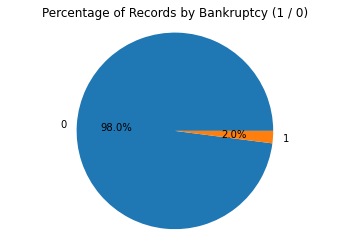

In [ ]:
plt.pie(bankruptcy_count, labels = bankruptcy_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of Records by Bankruptcy (1 / 0)")

In [ ]:
initial_set.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr32    float64
Attr33    float64
Attr34    float64
Attr35    float64
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    

# 2) Data cleaning

### No missing Values Present

In [ ]:
initial_set_missing_check = initial_set.isna().any()
initial_set_missing_check

Attr1     False
Attr2     False
Attr3     False
Attr4     False
Attr5     False
Attr6     False
Attr7     False
Attr8     False
Attr9     False
Attr10    False
Attr11    False
Attr12    False
Attr13    False
Attr14    False
Attr15    False
Attr16    False
Attr17    False
Attr18    False
Attr19    False
Attr20    False
Attr21    False
Attr22    False
Attr23    False
Attr24    False
Attr25    False
Attr26    False
Attr27    False
Attr28    False
Attr29    False
Attr30    False
Attr31    False
Attr32    False
Attr33    False
Attr34    False
Attr35    False
Attr36    False
Attr37    False
Attr38    False
Attr39    False
Attr40    False
Attr41    False
Attr42    False
Attr43    False
Attr44    False
Attr45    False
Attr46    False
Attr47    False
Attr48    False
Attr49    False
Attr50    False
Attr51    False
Attr52    False
Attr53    False
Attr54    False
Attr55    False
Attr56    False
Attr57    False
Attr58    False
Attr59    False
Attr60    False
Attr61    False
Attr62    False
Attr63  

### Given how the attributes represent ratios-any value greater than 3 standard deviations from the mean (greater/less than (-4,4)) could be a potential outlier.

### Since we are predicting bankruptcy, a negative outlier could indicate potential insolvency- therefore, we have chosen not to get rid of them through slicing. However, we will still standardize the data. 

In [ ]:
initial_set.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,0.00795,-0.00714,-0.00354,0.00500,-0.00469,0.00146,-0.00696,0.00905,0.00676,0.00746,-0.00209,-0.00650,-0.00563,-0.00696,-0.00499,0.00457,0.00856,-0.00765,-0.00397,-0.00733,0.01033,-0.00458,-0.00328,-0.01159,0.00658,0.00499,0.00505,-0.00324,0.00041,-0.00759,-0.00328,-0.00688,0.02274,0.01194,-0.00410,0.00934,0.00543,0.00747,-0.00088,-0.00199,-0.00731,-0.00506,-0.01059,-0.01000,-0.00614,0.00311,-0.00467,-0.00641,-0.00064,0.00098,-0.00185,-0.00729,-0.00795,-0.00311,-0.00881,0.00980,0.00521,-0.00975,-0.00266,0.00455,0.01433,-0.00686,0.02075,-0.00398,0.02030
std,1.39641,1.40944,1.01549,0.90802,1.39475,1.28671,1.41251,1.06443,1.17120,1.40735,1.22163,0.97098,0.62563,1.41251,1.22427,0.99343,1.05777,1.39735,1.10656,0.49370,1.39750,1.23867,1.10594,1.10261,1.36043,0.98467,1.33714,0.64395,1.00582,0.36136,1.06174,0.42135,1.18059,1.09910,1.16452,1.09016,1.28784,1.41125,0.90258,0.70938,0.00495,1.07858,0.12491,0.06329,1.41113,0.88862,0.83955,1.17867,1.02490,0.99090,1.05131,0.41215,0.32840,0.64786,0.81879,0.01737,0.71868,0.02612,0.46714,1.25257,1.17116,0.27729,1.11518,0.93088,0.14103
min,-9.47479,-140.60456,-25.59715,-0.38164,-138.72001,-26.24956,-141.17661,-0.96602,-1.29434,-2.52849,-97.17275,-77.27959,-4.25256,-141.17661,-64.25595,-7.24322,-1.01052,-139.01042,-98.84424,-0.07366,-0.02006,-100.67115,-99.02106,-89.68945,-7.49353,-7.83437,-0.18427,-2.38889,-7.03537,-0.23361,-92.35599,-0.03522,-3.44220,-2.41552,-81.57126,-1.49579,-0.03540,-0.95328,-86.74667,-3.32575,-0.36649,-91.70980,-0.03281,-0.02278,-140.72507,-2.56878,-0.07011,-88.95798,-86.86652,-0.99149,-1.56028,-0.03462,-14.89561,-2.44303,-19.00797,-1.65729,-42.38124,-0.03748,-3.21849,-0.04860,-0.41252,-0.02220,-0.74330,-0.05097,0.00000
25%,-0.07978,-0.05560,-0.51697,-0.19231,0.00680,-0.01605,-0.00802,-0.44567,-0.38818,-0.06858,-0.30578,-0.16155,-0.01219,-0.00802,-0.02051,-0.42562,-0.44571,-0.01003,0.00136,-0.05052,-0.01622,-0.33472,0.00436,-0.03950,-0.17672,-0.40938,-0.00998,-0.02109,-0.63926,-0.02310,-0.00173,-0.02433,-0.38248,-0.61725,-0.36291,-0.59458,-0.03438,-0.04530,-0.01169,-0.13731,-0.00744,-0.00920,-0.02053,-0.01618,0.00385,-0.18380,-0.03502,-0.22455,0.00594,-0.47916,-0.67117,-0.02372,-0.02921,-0.02077,-0.12723,0.00931,0.00320,-0.01077,-0.02274,-0.04342,-0.22124,-0.01685,-0.37138,-0.04160,0.00000
50%,-0.01920,0.00025,0.00319,-0.11797,0.00730,-0.01605,0.00428,-0.26015,-0.30784,0.00025,-0.05133,-0.09460,-0.01126,0.00429,-0.01194,-0.24440,-0.26087,0.00208,0.01653,-0.02890,-0.01569,-0.07019,0.01734,-0.00487,0.02746,-0.23293,-0.00995,-0.01824,-0.04605,-0.01903,0.01612,-0.01982,-0.18186,-0.31256,-0.08077,-0.19602,-0.03377,0.00095,0.01129,-0.10939,-0.00741,0.00977,-0.01520,-0.01285,0.00429,-0.10800,-0.02637,-0.00436,0.02456,-0.23077,-0.14449,-0.01924,-0.01864,-0.01777,-0.101

# 2. Data exploration:

Text(0.5, 1.0, 'Mean Sales Per Asset by Bankruptcy Label')

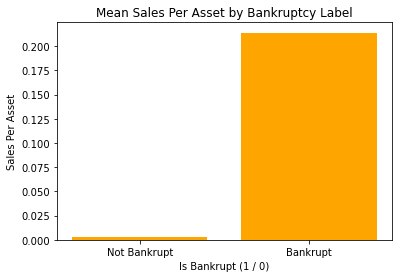

In [ ]:
#Bar chart to show sales to total assets
attr9_mean = initial_set.groupby(["label"]).mean()["Attr9"]

plt.bar(["Not Bankrupt", "Bankrupt"], attr9_mean, color = "orange")
plt.xlabel("Is Bankrupt (1 / 0)")
plt.ylabel("Sales Per Asset")
plt.title("Mean Sales Per Asset by Bankruptcy Label")
#0 = not bankrupt; 1 = bankrupt

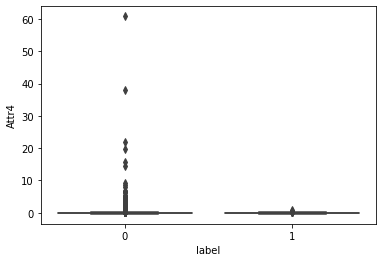

In [ ]:
#attr4 and attr46 boxplot with seaborn
sns.boxplot(x = "label", y = "Attr4", data = initial_set)
#attr4 = current ratio = current assets / short-term liabilities

## Correlation Matrix 

In [ ]:
corr = initial_set.corr()
corr

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label
Attr1,1.00000,-0.98795,-0.19424,0.00611,0.00046,0.93322,-0.97941,0.01957,0.50514,0.98884,-0.69265,-0.12688,-0.00186,-0.97941,0.00044,0.10741,0.01684,-0.97488,-0.01594,0.00741,-0.00226,-0.71997,0.02740,-0.08157,0.96821,0.08800,0.00267,0.00017,-0.03858,-0.01838,-0.01894,-0.00207,0.02135,0.03135,-0.60240,0.52515,0.00064,0.98694,0.01949,-0.03886,-0.00123,0.01726,-0.00056,-0.01045,0.00295,-0.01909,0.00197,-0.67350,0.01851,0.02639,0.39367,-0.00174,0.01450,0.00033,0.01218,0.02125,0.00537,0.01991,-0.00479,-0.00054,0.10405,-0.01310,0.02895,0.00052,-0.01694
Attr2,-0.98795,1.00000,0.21237,-0.00857,-0.00050,-0.94298,0.99622,-0.02666,-0.48524,-0.99908,0.77980,0.21122,0.00243,0.99622,0.00011,-0.04072,-0.02625,0.99159,0.02850,-0.01116,0.00084,0.79820,-0.01563,0.09320,-0.97482,-0.01958,-0.00052,0.00103,0.02648,0.01420,0.03255,0.00133,-0.01417,-0.00617,0.68324,-0.49524,-0.00140,-0.99831,-0.00838,0.03661,0.00059,-0.00674,-0.00329,0.00713,-0.00113,0.01781,-0.00230,0.74185,-0.00688,-0.02415,-0.39563,0.00150,-0.00928,0.00090,-0.01087,-0.01084,-0.00105,-0.03030,0.00357,0.00161,-0.09643,0.00874,-0.01546,0.00250,0.00803
Attr3,-0.19424,0.21237,1.00000,0.30383,0.00064,-0.22060,0.26217,0.33134,-0.11001,-0.20108,0.41172,0.19037,0.00560,0.26217,0.00203,0.33096,0.32694,0.26046,0.14186,-0.00373,-0.01099,0.38379,0.12942,0.07274,-0.11104,0.32289,0.00276,0.05752,-0.04734,-0.10686,0.14234,-0.01739,0.25738,0.21516,0.39135,-0.12325,0.00876,-0.21979,0.14815,0.22839,0.00076,0.12338,-0.02412,-0.04558,0.01558,0.26986,0.00524,0.35199,0.12760,0.56135,-0.67674,-0.01558,0.12710,0.05710,0.23378,0.15063,-0.01538,-0.15083,-0.01986,-0.01347,-0.09918,-0.13161,0.27946,0.02159,-0.07525
Attr4,0.00611,-0.00857,0.30383,1.00000,0.00182,-0.00130,0.00517,0.25816,-0.02163,0.01181,0.04562,0.14075,-0.00159,0.00517,-0.00319,0.19207,0.25532,0.00494,0.00752,0.01620,-0.00393,0.03640,0.00694,0.01230,0.02660,0.18394,0.00605,0.12551,-0.06625,-0.00748,0.00766,-0.00817,0.61084,0.13803,0.04161,-0.05239,0.00361,0.00860,0.01107,0.88794,0.00579,0.00680,0.01511,0.01120,0.00386,0.93795,0.00190,0.03825,0.00763,0.35223,-0.21585,-0.00767,0.09689,0.12517,0.05828,0.01045,0.00093,-0.00774,-0.00745,-0.00413,-0.00563,-0.01132,0.60527,0.00673,-0.02640
Attr5,0.00046,-0.00050,0.00064,0.00182,1.00000,0.00014,-0.00001,0.00438,0.03841,0.00055,0.00152,0.00149,0.00011,-0.00001,-0.00047,0.00450,0.00446,-0.00000,0.00020,-0.00167,0.00014,0.00171,0.00017,-0.00007,0.00096,0.00443,0.00011,0.00022,0.00096,-0.00016,0.00022,0.00400,0.00231,-0.00334,0.00195,-0.00433,0.00029,0.00061,0.00035,0.00208,-0.00004,0.00026,-0.00052,0.00101,-0.00001,0.00320,0.00162,0.00020,0.00007,0.00170,-0.01092,0.00354,0.00013,0.00021,0.00068,0.00115,-0.00003,-0.00079,0.00046,0.00033,-0.00408,-0.00019,0.00286,-0.00009,0.00115
Attr6,0.93322,-0.94298,-0.22060,-0.00130,0.00014,1.00000,-0.94204,0.00320,0.46306,0.94191,-0.73776,-0.21503,-0.00247,-0.94204,-0.00038,0.02936,0.00250,-0.93764,-0.02980,0.01089,-0.00046,-0.75337,0.01194,0.07967,0.91765,0.00953,-0.00012,-0.00011,-0.02076,-0.01031,-0.03358,-0.00119,0.00461,-0.00591,-0.64407,0.47891,0.00060,0.94262,0.00509,-0.04199,0.00014,0.00405,0.00420,-0.00488,-0.00005,-0.02547,0.00231,-0.70012,0.00447,0.00476,0.40225,-0.00084,0.00422,-0.00001,0.00504,0.00727,0.00093,0.03189,-0.00164,-0.00203,0.09271,-0.00499,0.00512,-0.00089,-0.00452
Attr7,-0.97941,0.99622,0.26217,0.00517,-0.00001,-0.94204,1.00000,0.01417,-0.48783,-0.99385,0.81176,0.25368,0.00317,1.00000,0.00023,0.00570,0.01458,0.99532,0.04164,-0.01387,-0.00018,0.82738,-0.00276,0.10090,-0.95767,0.02614,0.00057,0.00038,0.03

## Correlation Matrix Heatmap

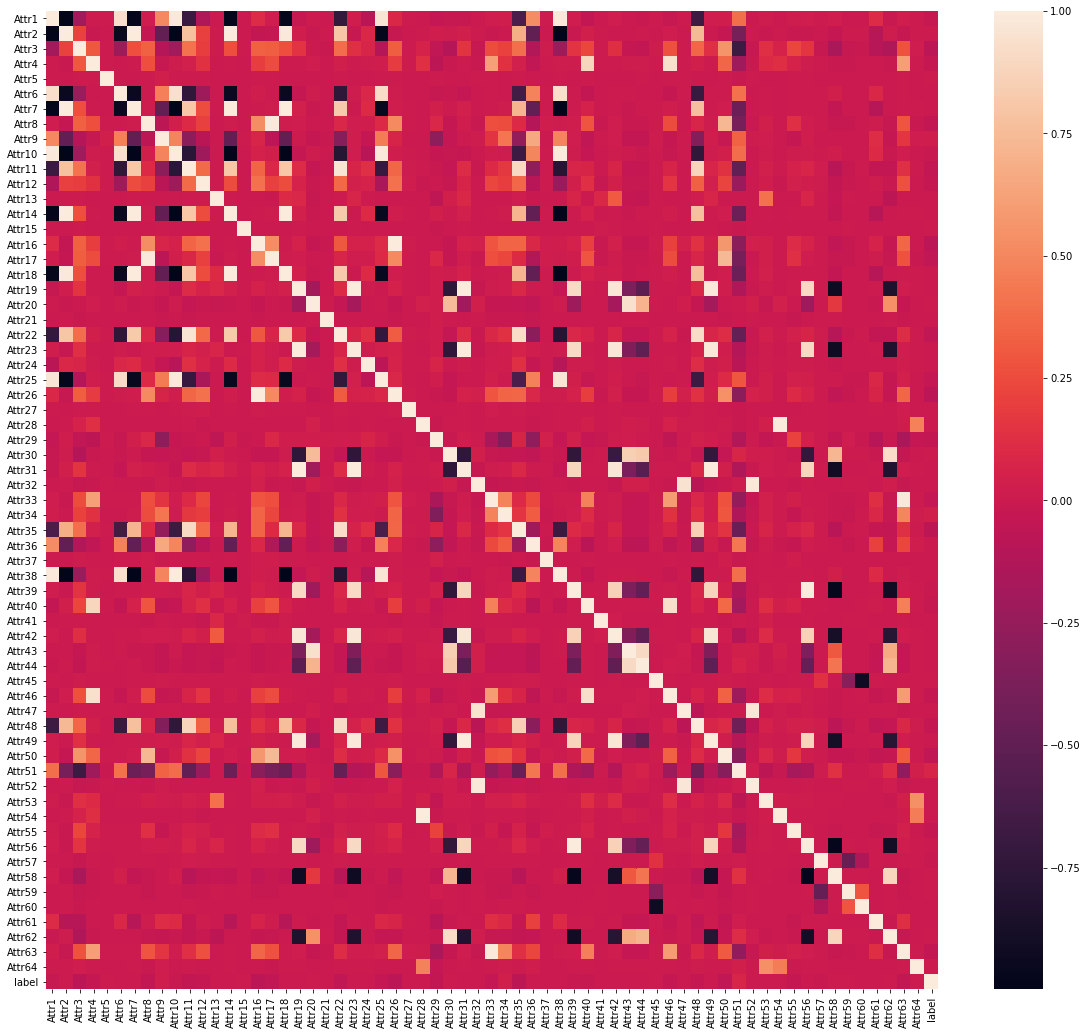

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 18)

ax=sns.heatmap(initial_set.corr())

## Plotting A Histogram for each Variable

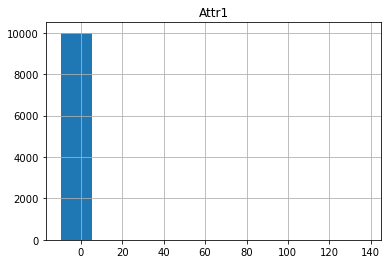

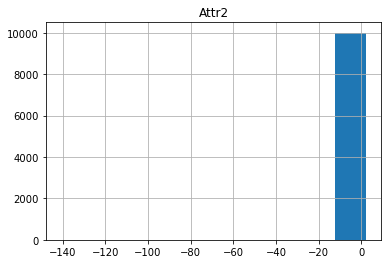

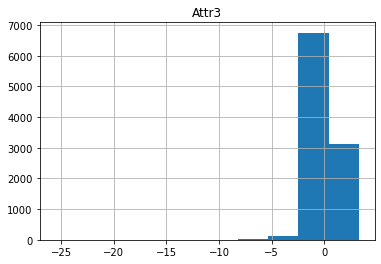

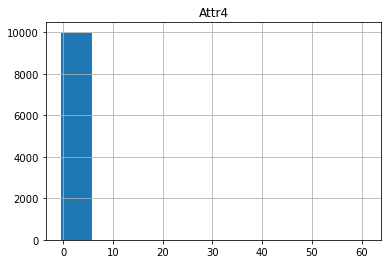

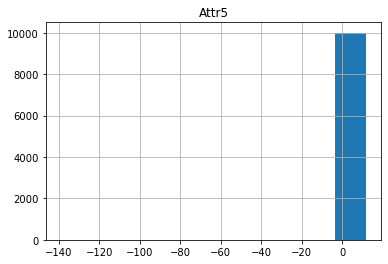

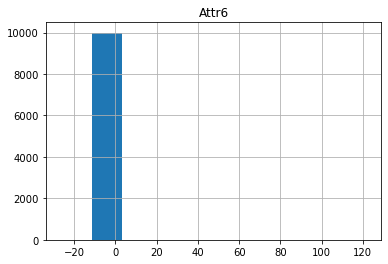

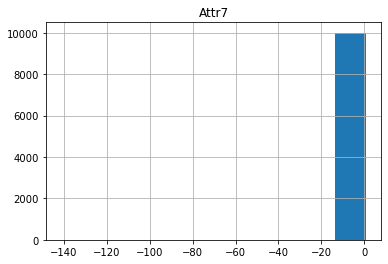

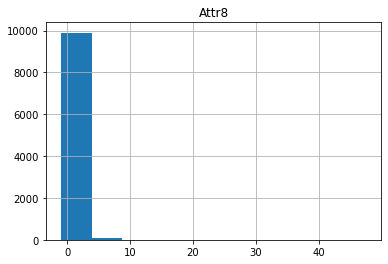

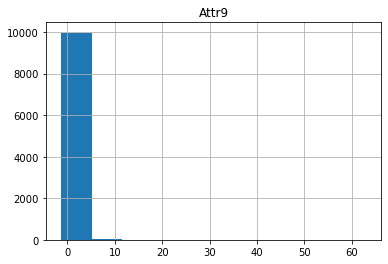

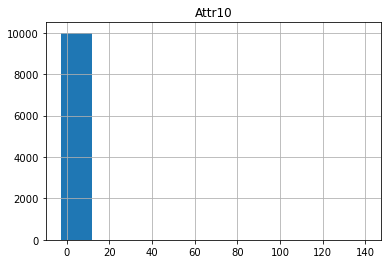

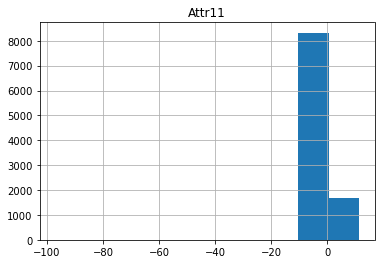

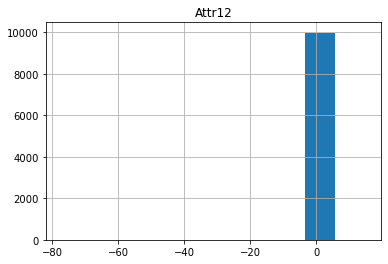

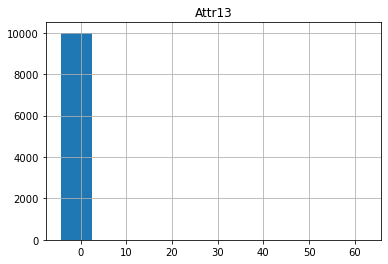

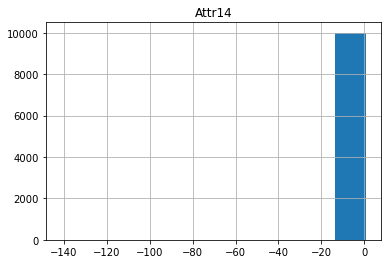

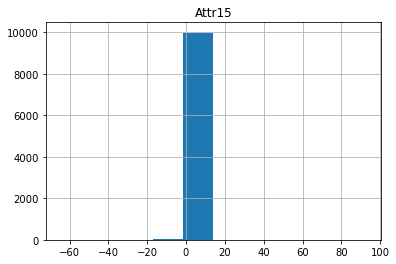

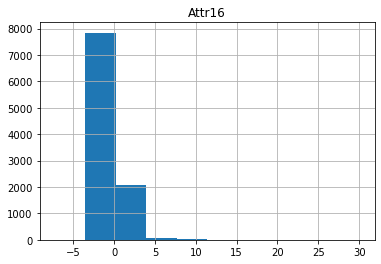

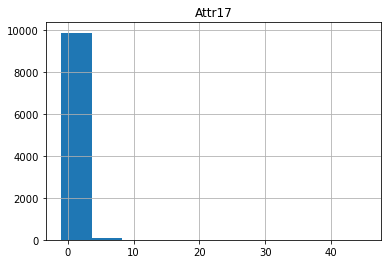

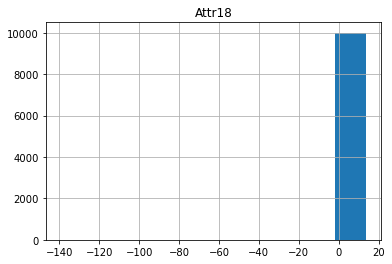

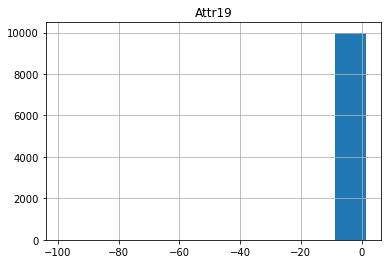

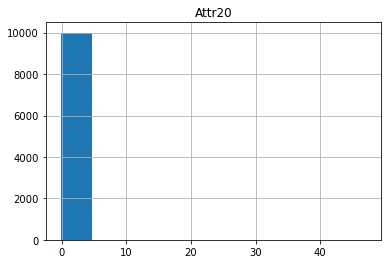

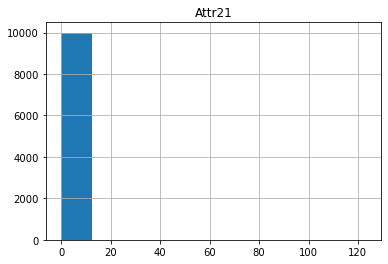

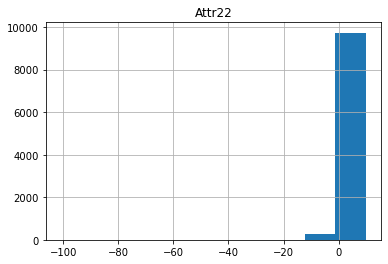

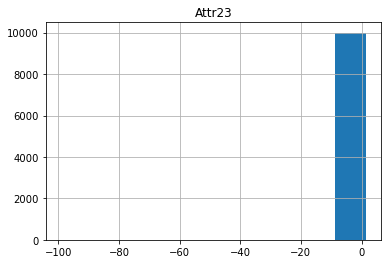

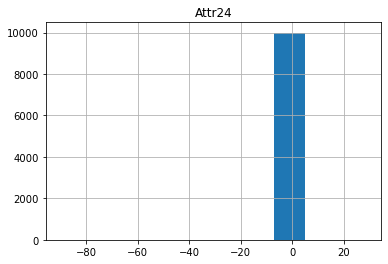

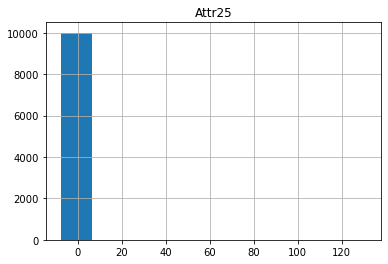

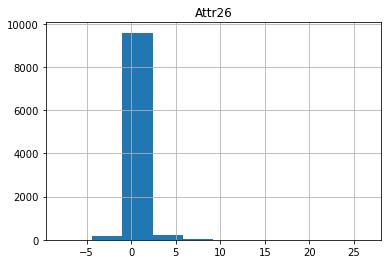

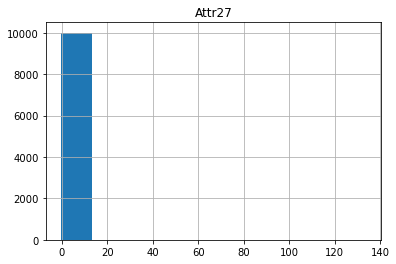

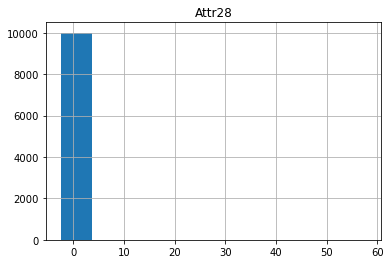

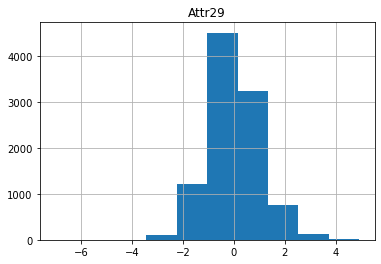

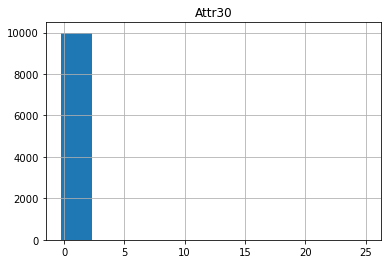

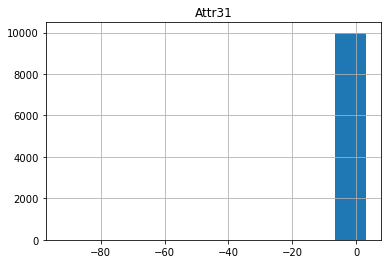

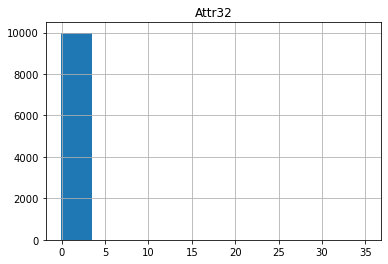

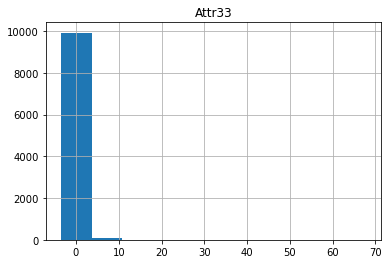

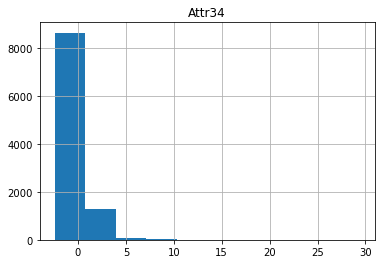

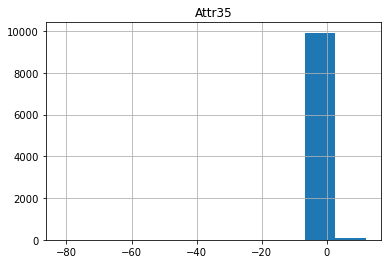

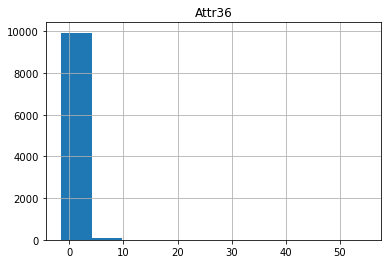

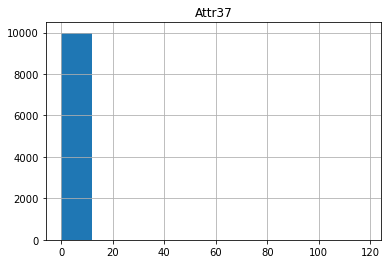

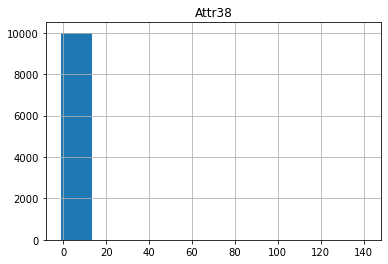

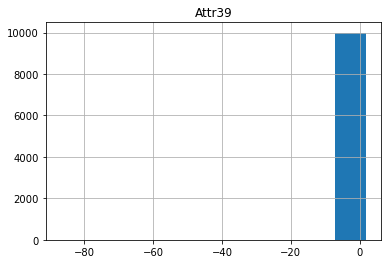

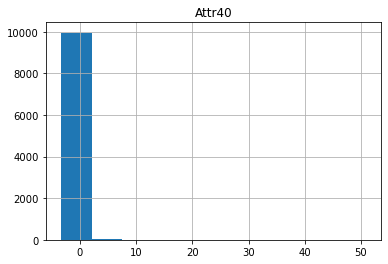

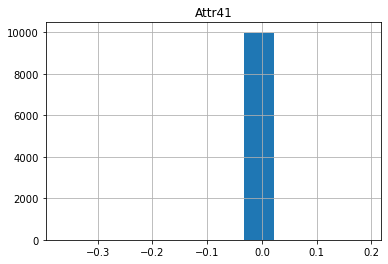

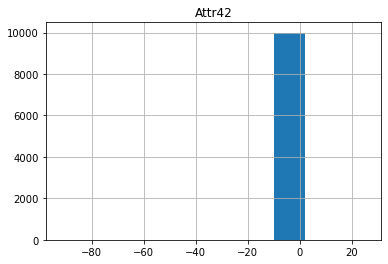

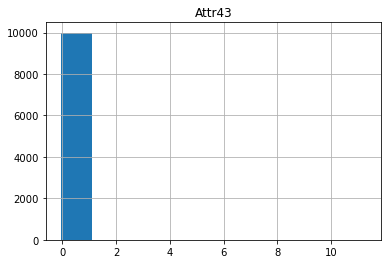

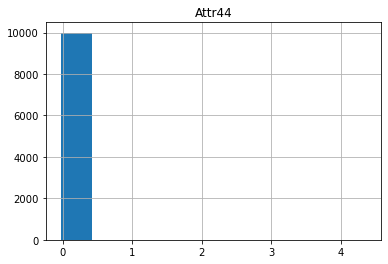

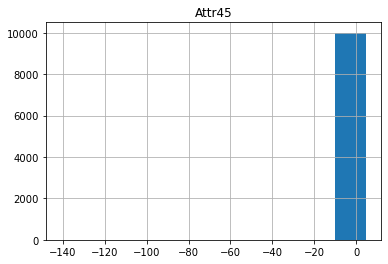

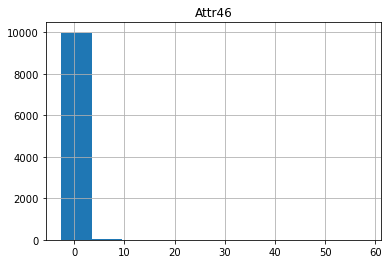

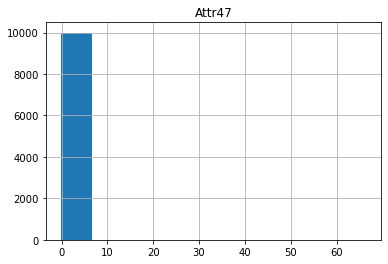

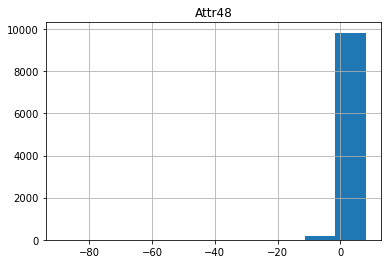

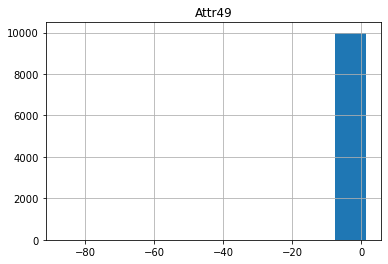

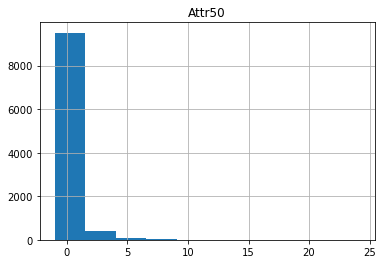

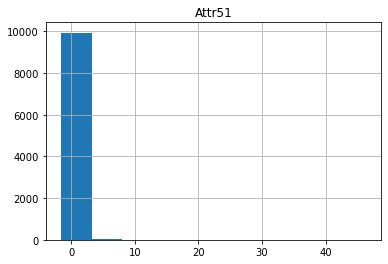

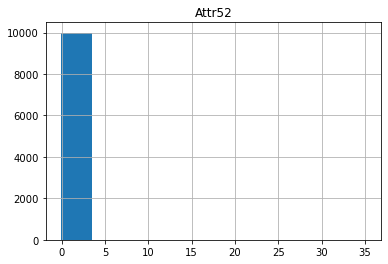

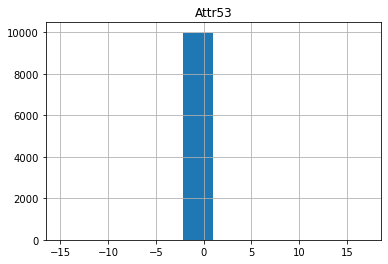

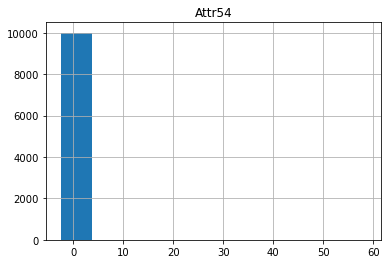

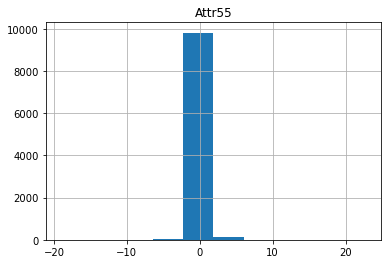

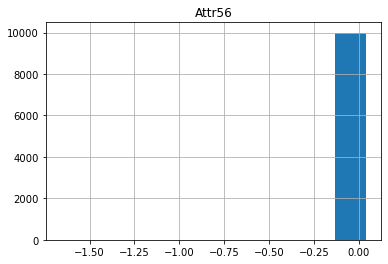

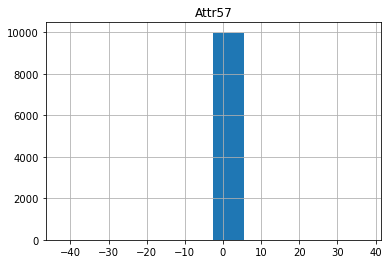

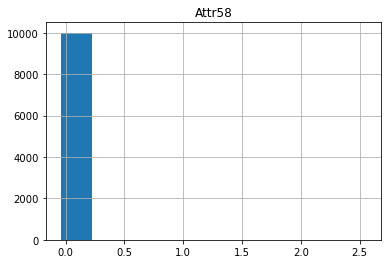

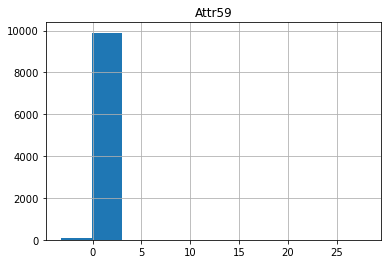

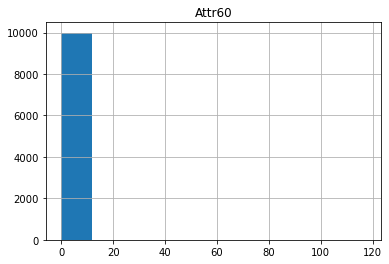

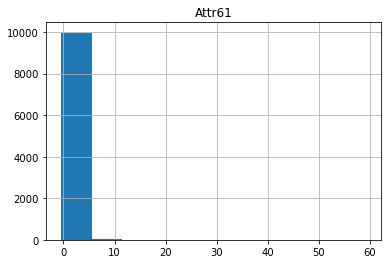

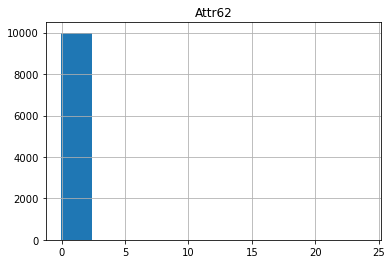

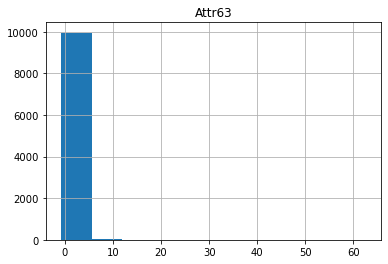

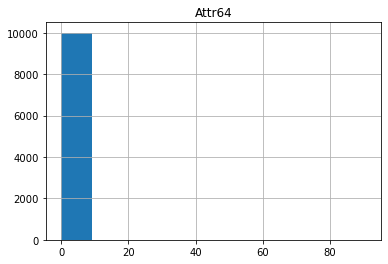

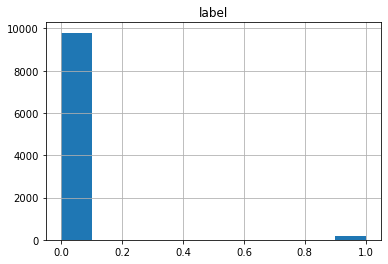

In [ ]:
for variable in initial_set.columns:
    initial_set[variable].hist()
    plt.title(variable)
    plt.show()

### Apart from looking impressive, the graphs serve to communicate a very important idea: we need to find a way to reduce the amount of variables we are working with. 

# Feature Engineering 

### However, we first need to make sure we have all of the necessary variables we have to work with,according to several reputable sources:
---
- 1) Based on Investopedia, we need The current ratio, The operating cash flow to sales ratio, the debt-to-equity ratio, and the Cash flow to debt ratio (https://www.investopedia.com/articles/active-trading/081315/financial-ratios-spot-companies-headed-bankruptcy.asp). 

- 2) NYU Stern School claims that Edward Altman's Z score could indicate bankruptcy (http://pages.stern.nyu.edu/~ealtman/Zscores.pdf)
##### Altman Z-Score = 1.2A + 1.4B + 3.3C + 0.6D + 1.0E 
##### A = working capital / total assets
##### B = retained earnings / total assets
##### C = earnings before interest and tax / total assets
##### D = market value of equity / total liabilities
##### E = sales / total assets
- 3) The J. Almamy's J-UK Model  (http://essay.utwente.nl/75423/1/Harjans_BA_BMS.pdf)
##### J = 1.484J1 + 0.043J2 + 0.39J3 + 0.004J4 + -0.424J5 + 0.75J6 
##### J1 = working capital/total assets
##### J2 = retained earnings/total assets
##### J3 = earnings before interest and taxes/total assets
##### J4 = market value equity/total liabilities
##### J5 = sales/total assets
##### J6 = cash flow from operations/total liabilities

- 4)From "Understanding Differences Between Financial Distress and Bankruptcy" we learned that we might need Total Debt/Total Assets, Net Fixed Assets/Total Assets, Short-term Debt/Total Debt, and the Quick Ratio (https://ageconsearch.umn.edu/record/50146/)

- 5) We also examined the "Systematic review of variables applied in bankruptcy prediction models of Visegrad group countries" (http://economic-research.pl/Journals/index.php/oc/article/view/1739). Specifically, we looked at Poland, which identified the following attributes: revenues from Sales/Total Assets Ratio, (Equity minus Share Capital) divided by Total Assets Ratio, EBT from Sales/Operating Costs Ratio, and Interest Income divided by (Profit from Economic Activity plus Interest Income) Ratio.

In [ ]:
initial_engin_set=initial_set.copy()

# 1 requirments correspond to Attr4, Attr42, 1/Attr8, Attr26  
initial_engin_set['D/E']=initial_set['Attr8']**(-1)
# 2 Altman Z-Score
initial_engin_set['AlZ']=initial_set['Attr3']*(1.2)+initial_set['Attr6']*(1.4)+initial_set['Attr7']*(3.3)+initial_set['Attr8']*(0.6)+initial_set['Attr9']*(1.0)
#3 J-UK Model
initial_engin_set['CFO/TL']=initial_set['Attr22']*initial_set['Attr17']
initial_engin_set['J-UK']=initial_set['Attr3']*(1.484)+initial_set['Attr6']*(0.043)+initial_set['Attr7']*(0.39)+initial_set['Attr8']*(0.004)+initial_set['Attr9']*(-.424)+initial_engin_set['CFO/TL']*(.75)
#4 requirments correspond to Attr2, Attr9/Attr64, Attr51/Attr2, Attr46  
initial_engin_set['STD/TL']=initial_set['Attr9']/initial_set['Attr64']
initial_engin_set['Quick']=initial_set['Attr51']/initial_set['Attr2']
#5 requirments correspond to Attr9, Attr25, Attr34*Attr17*Attr48, (Attr14-Attr18)/Attr14
initial_engin_set['EBT/OP']=initial_set['Attr34']*initial_set['Attr17']*initial_set['Attr48']
initial_engin_set['int/prfint']=(initial_set['Attr14']-initial_set['Attr18'])/initial_set['Attr14']

In [ ]:
initial_engin_set

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint
0,-0.03154,-0.09131,-0.04027,-0.01353,0.00741,-0.01605,-0.00026,0.64124,-0.74839,0.12679,-0.21442,-0.03658,-0.01093,-0.00027,-0.00530,-0.24280,0.57999,-0.00240,0.02926,-0.07034,-0.01644,-0.40317,0.03309,-0.00452,0.05022,-0.20667,-0.00999,-0.01937,-0.63111,-0.01555,0.06622,-0.01397,-0.36865,-0.14438,-0.43560,-0.97416,-0.03408,0.07976,-0.01617,0.18124,-0.00721,-0.01395,-0.01931,-0.00908,0.01723,0.14745,-0.04194,-0.14790,0.00486,-0.19233,-1.02709,-0.01332,-0.01636,-0.01811,-0.11058,0.01437,0.00546,-0.01414,-0.02092,0.06840,-0.21448,-0.01391,-0.17394,-0.04679,0,1.55947,-0.43530,-0.23384,0.08395,15.99532,11.24803,0.01239,-7.90898
1,-0.23173,-0.04945,0.30438,-0.08098,0.00751,-0.01605,-0.03496,0.07471,0.46981,0.07376,-0.83551,-0.29961,-0.01306,-0.03497,-0.11963,-0.60333,0.04067,-0.03657,-0.02591,-0.04795,-0.01696,-0.87342,-0.02219,0.04893,0.27410,-0.59146,-0.01093,-0.01583,-1.16855,-0.02221,-0.03149,-0.02316,0.02198,1.22897,-0.98626,0.18976,-0.02446,0.01107,-0.05264,-0.08808,-0.00788,-0.03964,-0.01644,-0.00966,0.00237,-0.01353,-0.03503,-0.78962,-0.02522,0.18678,-0.07906,-0.02253,-0.00301,-0.01446,-0.11492,0.00849,-0.00839,-0.00867,-0.02309,-0.03350,-0.20580,-0.01517,-0.07306,-0.02724,0,13.38507,0.74205,-0.03552,0.21183,-17.24992,1.59884,-0.03946,-0.04570
2,-0.05860,0.06506,-0.48840,-0.18949,0.00657,-0.01605,-0.00495,-0.45629,0.27035,-0.07129,0.15694,-0.15121,-0.01172,-0.00496,0.00948,-0.36716,-0.46482,-0.00702,0.00439,0.00176,-0.01750,0.15244,0.00817,0.03065,-0.11435,-0.33940,-0.00993,-0.02093,0.09621,-0.01523,0.00913,-0.01599,-0.32020,0.05997,0.76616,-0.00081,-0.03454,-0.02380,0.06847,-0.14756,-0.00740,0.02026,-0.01538,-0.01652,0.00391,-0.23474,-0.01295,0.08458,0.03026,-0.46863,0.39359,-0.01534,-0.03016,-0.01964,-0.12327,0.01082,0.00678,-0.00944,-0.00792,-0.04346,0.01974,-0.01174,-0.29162,-0.03358,0,-2.19160,-0.62832,-0.07086,-0.89701,-8.05104,6.04962,-0.00236,-0.41517
3,-0.06938,0.04464,-0.18168,-0.14003,0.00748,-0.01092,-0.00560,-0.46297,-0.28675,-0.08527,-0.31476,-0.14553,-0.01101,-0.00560,0.04591,-0.45450,-0.41369,-0.00765,0.01572,-0.00643,-0.01611,-0.08946,0.01459,-0.03816,-0.10595,-0.44299,-0.00992,-0.01957,0.29628,0.01467,0.01129,0.00659,-0.57718,-0.64308,-0.10031,-1.06979,-0.03447,-0.00411,0.07102,-0.13932,-0.00734,0.05576,0.01869,0.02076,0.00406,-0.06791,-0.01661,0.07952,0.05851,-0.51519,-0.26790,0.00728,-0.03393,-0.01998,-0.07708,0.01068,0.00538,-0.01084,0.00138,-0.04283,-0.35052,0.00297,-0.55469,-0.04682,0,-2.15996,-0.81631,0.03701,-0.12479,6.12404,-6.00118,0.02115,-0.36564
4,0.23642,-0.05191,0.67834,-0.01468,0.00788,-0.01605,0.05742,0.09718,0.42341,0.07688,0.91886,0.20869,-0.00891,0.05741,-0.02102,0.74419,0.06206,0.05440,0.06732,-0.04311,-0.01605,0.86683,0.05978,0.10772,-0.12763,0.67520,-0.00906,-0.01206,-0.50147,-0.02462,0.06962,-0.02194,-0.06916,0.89199,1.00464,0.14542,-0.03040,0.01969,0.07630,0.01786,-0.00744,0.05730,-0.01701,-0.01104,0.00655,0.04988,-0.03118,0.61541,0.06305,0.34287,-0.21025,-0.02131,0.00523,-0.01074,-0.07664,0.01097,0.02529,-0.01106,-0.02254,-0.03589,-0.18156,-0.01562,-0.02784,-0.02369,0,10.28991,1.46273,0.05379,0.88957,-17.86936,4.05018,0.03407,0.05255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.07953,0.03481,-0.49208,-0.18987,0.00669,-0.00646,-0.00858,-0.3

# Feature Selection

### Preliminary Steps:
---
- Given how we are dealing with binary data, logistic regression seems to be the optimal choice for modelling. As we progress through each step, we will carry out the process and watch how our choices impact the resulting evaluation metrics.

#### a) Evaluating the initial dataset without intervention

In [ ]:
train_data, val_data = train_test_split(initial_set, train_size = 0.7, random_state = 0)

In [ ]:
# split the label out from the train and validation sets
y_train = train_data.label
x_train = train_data.drop(columns = ["label"])

y_val = val_data.label
x_val = val_data.drop(columns = ["label"])

In [ ]:
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

In [ ]:
logit_model = LogisticRegression(random_state=0).fit(x_train, train_data.label)

In [ ]:
logit_model.predict_proba(x_train)

array([[9.96944234e-01, 3.05576613e-03],
       [9.66363270e-01, 3.36367304e-02],
       [9.89518067e-01, 1.04819326e-02],
       ...,
       [9.96208265e-01, 3.79173461e-03],
       [9.58054026e-01, 4.19459742e-02],
       [9.99999940e-01, 6.01723796e-08]])

In [ ]:
y_train_pred = logit_model.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_val_pred = logit_model.predict(x_val)
y_val_pred

array([0, 1, 0, ..., 0, 0, 0])

### Calculating evaluation metrics 

#### Accuracy

In [ ]:
metrics.accuracy_score(train_data.label, y_train_pred)

0.9808571428571429

In [ ]:
metrics.accuracy_score(val_data.label, y_val_pred)

0.973

#### Precision

In [ ]:
metrics.precision_score(train_data.label, y_train_pred)

0.16666666666666666

In [ ]:
metrics.precision_score(val_data.label, y_val_pred)

0.1

#### Recall

In [ ]:
metrics.recall_score(train_data.label, y_train_pred)

0.007692307692307693

In [ ]:
metrics.recall_score(val_data.label, y_val_pred)

0.0136986301369863

#### Confusion Matrix

In [ ]:
metrics.confusion_matrix(train_data.label, y_train_pred)

array([[6865,    5],
       [ 129,    1]])

In [ ]:
metrics.confusion_matrix(val_data.label, y_val_pred)

array([[2918,    9],
       [  72,    1]])

#### F1_score

In [ ]:
metrics.f1_score(train_data.label, y_train_pred)

0.014705882352941178

In [ ]:
metrics.f1_score(val_data.label, y_val_pred)

0.024096385542168672

#### AUC

In [ ]:
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_val)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data.label, y_train_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.9011062590975255

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.8622789241403841

#### b) Evaluating the initial dataset with engineered features

In [ ]:
train_data, val_data = train_test_split(initial_engin_set, train_size = 0.7, random_state = 0)

In [ ]:
# split the label out from the train and validation sets
y_train = train_data.label
x_train = train_data.drop(columns = ["label"])

y_val = val_data.label
x_val = val_data.drop(columns = ["label"])

In [ ]:
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

In [ ]:
logit_model = LogisticRegression(random_state=0).fit(x_train, train_data.label)

In [ ]:
logit_model.predict_proba(x_train)

array([[9.96816613e-01, 3.18338672e-03],
       [9.66194574e-01, 3.38054263e-02],
       [9.89244085e-01, 1.07559154e-02],
       ...,
       [9.95859287e-01, 4.14071255e-03],
       [9.55041954e-01, 4.49580462e-02],
       [9.99999916e-01, 8.44386994e-08]])

In [ ]:
y_train_pred = logit_model.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_val_pred = logit_model.predict(x_val)
y_val_pred

array([0, 1, 0, ..., 0, 0, 0])

### Calculating evaluation metrics 

#### Accuracy

In [ ]:
metrics.accuracy_score(train_data.label, y_train_pred)

0.9811428571428571

In [ ]:
metrics.accuracy_score(val_data.label, y_val_pred)

0.9736666666666667

#### Precision

In [ ]:
metrics.precision_score(train_data.label, y_train_pred)

0.3333333333333333

In [ ]:
metrics.precision_score(val_data.label, y_val_pred)

0.125

#### Recall

In [ ]:
metrics.recall_score(train_data.label, y_train_pred)

0.015384615384615385

In [ ]:
metrics.recall_score(val_data.label, y_val_pred)

0.0136986301369863

#### Confusion Matrix

In [ ]:
metrics.confusion_matrix(train_data.label, y_train_pred)

array([[6866,    4],
       [ 128,    2]])

In [ ]:
metrics.confusion_matrix(val_data.label, y_val_pred)

array([[2920,    7],
       [  72,    1]])

#### F1_score

In [ ]:
metrics.f1_score(train_data.label, y_train_pred)

0.029411764705882356

In [ ]:
metrics.f1_score(val_data.label, y_val_pred)

0.024691358024691357

#### AUC

In [ ]:
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_val)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data.label, y_train_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.9011633635651103

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.8611557019904432

#### Overall, we see that adding the additional features has improved the results of all metrics, except AUC(which has remained roughly the same)

### Step 1: Before we implement Feature importance (a hyperparameter-tuned random forest) and Dimension reduction (Logistic regression/ Lasso)- we are going to examine the correlation matrix again and select all variables whose coefficient with bankruptcy is greater than 0. The number was selected based on the logic that we are searching for features that positively contribute to the occurence of bankruptcy. Regardless, it should relieve the pressure off of the two models we might subsequently utilize.

In [ ]:
corr = initial_engin_set.corr()
corr

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint
Attr1,1.00000,-0.98795,-0.19424,0.00611,0.00046,0.93322,-0.97941,0.01957,0.50514,0.98884,-0.69265,-0.12688,-0.00186,-0.97941,0.00044,0.10741,0.01684,-0.97488,-0.01594,0.00741,-0.00226,-0.71997,0.02740,-0.08157,0.96821,0.08800,0.00267,0.00017,-0.03858,-0.01838,-0.01894,-0.00207,0.02135,0.03135,-0.60240,0.52515,0.00064,0.98694,0.01949,-0.03886,-0.00123,0.01726,-0.00056,-0.01045,0.00295,-0.01909,0.00197,-0.67350,0.01851,0.02639,0.39367,-0.00174,0.01450,0.00033,0.01218,0.02125,0.00537,0.01991,-0.00479,-0.00054,0.10405,-0.01310,0.02895,0.00052,-0.01694,0.00015,-0.75030,0.81876,-0.17194,-0.01276,0.00056,-0.19252,0.00070
Attr2,-0.98795,1.00000,0.21237,-0.00857,-0.00050,-0.94298,0.99622,-0.02666,-0.48524,-0.99908,0.77980,0.21122,0.00243,0.99622,0.00011,-0.04072,-0.02625,0.99159,0.02850,-0.01116,0.00084,0.79820,-0.01563,0.09320,-0.97482,-0.01958,-0.00052,0.00103,0.02648,0.01420,0.03255,0.00133,-0.01417,-0.00617,0.68324,-0.49524,-0.00140,-0.99831,-0.00838,0.03661,0.00059,-0.00674,-0.00329,0.00713,-0.00113,0.01781,-0.00230,0.74185,-0.00688,-0.02415,-0.39563,0.00150,-0.00928,0.00090,-0.01087,-0.01084,-0.00105,-0.03030,0.00357,0.00161,-0.09643,0.00874,-0.01546,0.00250,0.00803,-0.00107,0.78061,-0.82544,0.18421,0.01284,-0.00001,0.21226,-0.00062
Attr3,-0.19424,0.21237,1.00000,0.30383,0.00064,-0.22060,0.26217,0.33134,-0.11001,-0.20108,0.41172,0.19037,0.00560,0.26217,0.00203,0.33096,0.32694,0.26046,0.14186,-0.00373,-0.01099,0.38379,0.12942,0.07274,-0.11104,0.32289,0.00276,0.05752,-0.04734,-0.10686,0.14234,-0.01739,0.25738,0.21516,0.39135,-0.12325,0.00876,-0.21979,0.14815,0.22839,0.00076,0.12338,-0.02412,-0.04558,0.01558,0.26986,0.00524,0.35199,0.12760,0.56135,-0.67674,-0.01558,0.12710,0.05710,0.23378,0.15063,-0.01538,-0.15083,-0.01986,-0.01347,-0.09918,-0.13161,0.27946,0.02159,-0.07525,0.01274,0.63380,-0.22387,0.91439,0.00299,0.01021,0.12515,0.00366
Attr4,0.00611,-0.00857,0.30383,1.00000,0.00182,-0.00130,0.00517,0.25816,-0.02163,0.01181,0.04562,0.14075,-0.00159,0.00517,-0.00319,0.19207,0.25532,0.00494,0.00752,0.01620,-0.00393,0.03640,0.00694,0.01230,0.02660,0.18394,0.00605,0.12551,-0.06625,-0.00748,0.00766,-0.00817,0.61084,0.13803,0.04161,-0.05239,0.00361,0.00860,0.01107,0.88794,0.00579,0.00680,0.01511,0.01120,0.00386,0.93795,0.00190,0.03825,0.00763,0.35223,-0.21585,-0.00767,0.09689,0.12517,0.05828,0.01045,0.00093,-0.00774,-0.00745,-0.00413,-0.00563,-0.01132,0.60527,0.00673,-0.02640,0.00342,0.15847,0.02293,0.30290,0.00127,0.00276,0.09660,0.00295
Attr5,0.00046,-0.00050,0.00064,0.00182,1.00000,0.00014,-0.00001,0.00438,0.03841,0.00055,0.00152,0.00149,0.00011,-0.00001,-0.00047,0.00450,0.00446,-0.00000,0.00020,-0.00167,0.00014,0.00171,0.00017,-0.00007,0.00096,0.00443,0.00011,0.00022,0.00096,-0.00016,0.00022,0.00400,0.00231,-0.00334,0.00195,-0.00433,0.00029,0.00061,0.00035,0.00208,-0.00004,0.00026,-0.00052,0.00101,-0.00001,0.00320,0.00162,0.00020,0.00007,0.00170,-0.01092,0.00354,0.00013,0.00021,0.00068,0.00115,-0.00003,-0.00079,0.00046,0.00033,-0.00408,-0.00019,0.00286,-0.00009,0.00115,0.00011,0.01454,-0.00012,-0.01117,-0.00285,-0.00008,0.00051,0.00005
Attr6,0.93322,-0.94298,-0.22060,-0.00130,0.00014,1.00000,-0.94204,0.00320,0.46306,0.94191,-0.73776,-0.21503,-0.00247,-0.94204,-0.00038,0.02936,0.00250,-0.93764,-0.02980,0.01089,-0.00046,-0.75337,0.01194,0.07967,0.91765,0.00953,-0.00012,-0.00011,-0.02076,-0.01031,-0.03358,-0.00119,0.00461,-0.00591,-0.64407,0.47891,0.00060,0.94262,0.00509,-0.04199,0.00014,0.00405,0.00420,-0.00488,-0.00005,-0.02547,0.00231,-0.70012,0.

In [ ]:
cor_values=(corr["label"].sort_values(ascending=False))

cor_values= cor_values.to_frame()
cor_values = cor_values.iloc[1:]
cor_values

,label
Attr51,0.07455
Attr34,0.03170
Attr9,0.02547
Attr2,0.00803
CFO/TL,0.00689
Attr64,0.00320
Attr59,0.00274
Attr20,0.00244
Attr58,0.00213
Attr15,0.00194


In [ ]:
cor_values_true= cor_values.loc[(cor_values['label'] >= 0)]
cor_values_true

,label
Attr51,0.07455
Attr34,0.03170
Attr9,0.02547
Attr2,0.00803
CFO/TL,0.00689
Attr64,0.00320
Attr59,0.00274
Attr20,0.00244
Attr58,0.00213
Attr15,0.00194


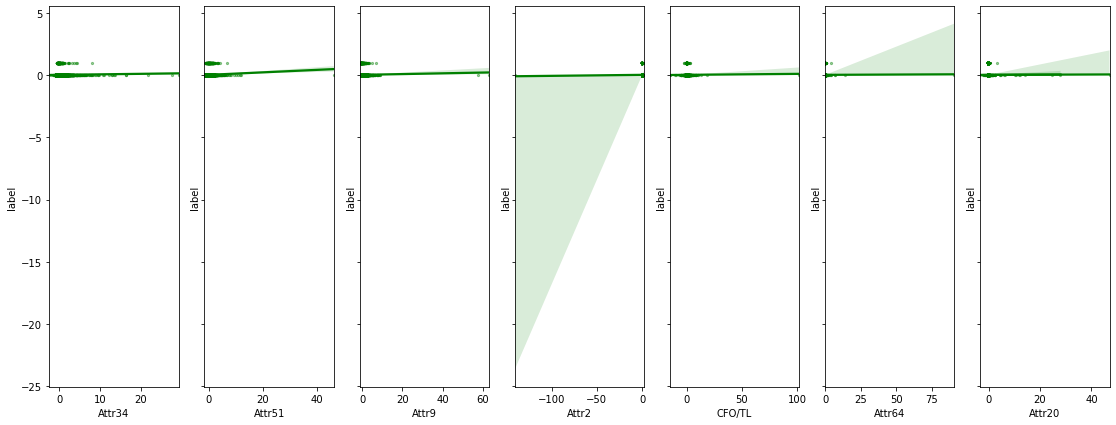

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(19,7),sharey=True)

sns.regplot('Attr34', 'label', data=initial_engin_set, ax=ax[0], scatter_kws={'alpha': 0.4, 's': 5}, color='green')

sns.regplot('Attr51', 'label', data=initial_engin_set, ax=ax[1], scatter_kws={'alpha': 0.4, 's': 5} , color='green')

sns.regplot('Attr9', 'label', data=initial_engin_set, ax=ax[2], scatter_kws={'alpha': 0.4, 's': 5}, color='green')

sns.regplot('Attr2', 'label', data=initial_engin_set, ax=ax[3], scatter_kws={'alpha': 0.4, 's': 5}, color='green')

sns.regplot('CFO/TL', 'label', data=initial_engin_set, ax=ax[4], scatter_kws={'alpha': 0.4, 's': 5}, color='green')

sns.regplot('Attr64', 'label', data=initial_engin_set, ax=ax[5], scatter_kws={'alpha': 0.4, 's': 5}, color='green')

sns.regplot('Attr59', 'label', data=initial_engin_set, ax=ax[6], scatter_kws={'alpha': 0.4, 's': 5}, color='green')

sns.regplot('Attr20', 'label', data=initial_engin_set, ax=ax[6], scatter_kws={'alpha': 0.4, 's': 5}, color='green')


#### Just from these graphics we can see that under normal circumstances, this data would be considered nuetral or zere- however, thanks to certain outliers, the scatterplot is considered positive (tilted up). Isolating those occurences could potentially lead us to discovering what influences bankruptcy.

#### Testing the impact on logisitc regression

In [ ]:
initial_core_set= initial_engin_set[['Attr34','Attr51','Attr9','Attr2','CFO/TL','Attr64','Attr59','Attr20','Attr58','Attr15','Attr62','Attr30','Attr5','Quick','Attr45','Attr32','Attr43','label']]


In [ ]:
train_data, val_data = train_test_split(initial_core_set, train_size = 0.7, random_state = 0)

In [ ]:
# split the label out from the train and validation sets
y_train = train_data.label
x_train = train_data.drop(columns = ["label"])

y_val = val_data.label
x_val = val_data.drop(columns = ["label"])

In [ ]:
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

In [ ]:
logit_model = LogisticRegression(random_state=0).fit(x_train, train_data.label)

In [ ]:
logit_model.predict_proba(x_train)

array([[0.98636388, 0.01363612],
       [0.96474992, 0.03525008],
       [0.98746235, 0.01253765],
       ...,
       [0.98983619, 0.01016381],
       [0.98535133, 0.01464867],
       [0.98592617, 0.01407383]])

In [ ]:
y_train_pred = logit_model.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_val_pred = logit_model.predict(x_val)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

### Calculating evaluation metrics 

#### Accuracy

In [ ]:
metrics.accuracy_score(train_data.label, y_train_pred)

0.9811428571428571

In [ ]:
metrics.accuracy_score(val_data.label, y_val_pred)

0.9736666666666667

#### Precision

In [ ]:
metrics.precision_score(train_data.label, y_train_pred)

0.0

In [ ]:
metrics.precision_score(val_data.label, y_val_pred)

0.0

#### Recall

In [ ]:
metrics.recall_score(train_data.label, y_train_pred)

0.0

In [ ]:
metrics.recall_score(val_data.label, y_val_pred)

0.0

#### Confusion Matrix

In [ ]:
metrics.confusion_matrix(train_data.label, y_train_pred)

array([[6868,    2],
       [ 130,    0]])

In [ ]:
metrics.confusion_matrix(val_data.label, y_val_pred)

array([[2921,    6],
       [  73,    0]])

#### F1_score

In [ ]:
metrics.f1_score(train_data.label, y_train_pred)

0.0

In [ ]:
metrics.f1_score(val_data.label, y_val_pred)

0.0

#### AUC

In [ ]:
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_val)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data.label, y_train_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.7101601164483261

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.7050605837947124

#### Here we see that all of the value of all the metrics has decreased (except Accuracy)- meaning that there is some unseen pattern that cannot be simply defined.

### Step 2: Given what we have said above, we will now test whether there exists an better combination of variables that can produce an even greater AUC value. For this purpose, we will run Random Forest with Hypertuning and evaluate the importance ranking. 

#### Data Standartization & Train/Test Split

In [ ]:
train_data, val_data = train_test_split(initial_engin_set, train_size = 0.7, random_state = 0)
y_train = train_data.label
x_train = train_data.drop(columns = ["label"])

y_val = val_data.label
x_val = val_data.drop(columns = ["label"])

for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

#### Hypertuning Random Forest

In [ ]:
parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5),
              "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [2, 3, 4, 5, 6],
              "n_estimators": [100, 150, 200, 250, 300, 350, 400]}

In [ ]:
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 200,
                        random_state = 0)

In [ ]:
clf.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=200, n_jobs=4,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': [2, 3, 4, 5, 6],
                                        'max_samples': [0.1, 0.15, 0.2, 0.25,
                                                        0.3, 0.35, 0.4],
                                        'min_samples_leaf': range(5, 55, 5),
                                        'min_samples_split': range(10, 110, 5),
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=0, scoring='roc_auc')

In [ ]:
clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 40,
 'min_samples_leaf': 35,
 'max_samples': 0.4,
 'max_features': 6,
 'max_depth': 6}

In [ ]:
imp = pd.DataFrame()

imp["var"] = x_train.columns

imp["imp"] = clf.best_estimator_.feature_importances_

imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

imp

,var,imp
0,Attr34,0.05321
1,Attr26,0.05062
2,Attr16,0.03703
3,Attr27,0.03607
4,Attr13,0.03526
5,Attr46,0.03157
6,Attr9,0.02758
7,Attr39,0.02194
8,Attr25,0.02020
9,Attr35,0.01969


In [ ]:
y_train_prob = clf.predict_proba(x_train)
y_train_prob

array([[0.9832906 , 0.0167094 ],
       [0.97152008, 0.02847992],
       [0.99359   , 0.00641   ],
       ...,
       [0.99882081, 0.00117919],
       [0.99236336, 0.00763664],
       [0.99451686, 0.00548314]])

In [ ]:
y_val_prob = clf.predict_proba(x_val)
y_val_prob

array([[0.92682903, 0.07317097],
       [0.94355077, 0.05644923],
       [0.99896653, 0.00103347],
       ...,
       [0.99759179, 0.00240821],
       [0.9894269 , 0.0105731 ],
       [0.94239298, 0.05760702]])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data.label, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.9288075243533759

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(val_data.label, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.8266727819872608

#### Overall, this operation has served to boost the AUC for the training set, but not for the validation set, which is not ideal

### Step 3: Given how outright reducing the ammount of variables doesn't seem to help- we can instead try   Logistic regression with l2 penalty (which will, at the very least, help us with overfitting).

In [ ]:
train_data, val_data = train_test_split(initial_engin_set, train_size = 0.7, random_state = 0)

In [ ]:
# split the label out from the train and validation sets
y_train = train_data.label
x_train = train_data.drop(columns = ["label"])

y_val = val_data.label
x_val = val_data.drop(columns = ["label"])

In [ ]:
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

In [ ]:
logit_model = LogisticRegressionCV(cv = 5, penalty = "l2", random_state = 0, solver = "liblinear").fit(x_train, train_data.label)

In [ ]:
logit_model.predict_proba(x_train)

array([[0.76401514, 0.23598486],
       [0.75533111, 0.24466889],
       [0.76571939, 0.23428061],
       ...,
       [0.77519984, 0.22480016],
       [0.76075783, 0.23924217],
       [0.78695812, 0.21304188]])

In [ ]:
y_train_pred = logit_model.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_val_pred = logit_model.predict(x_val)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

### Calculating evaluation metrics 

#### Accuracy

In [ ]:
metrics.accuracy_score(train_data.label, y_train_pred)

0.9814285714285714

In [ ]:
metrics.accuracy_score(val_data.label, y_val_pred)

0.975

#### Precision

In [ ]:
metrics.precision_score(train_data.label, y_train_pred)

0.0

In [ ]:
metrics.precision_score(val_data.label, y_val_pred)

0.0

#### Recall

In [ ]:
metrics.recall_score(train_data.label, y_train_pred)

0.0

In [ ]:
metrics.recall_score(val_data.label, y_val_pred)

0.0

#### Confusion Matrix

In [ ]:
metrics.confusion_matrix(train_data.label, y_train_pred)

array([[6870,    0],
       [ 130,    0]])

In [ ]:
metrics.confusion_matrix(val_data.label, y_val_pred)

array([[2925,    2],
       [  73,    0]])

#### F1_score

In [ ]:
metrics.f1_score(train_data.label, y_train_pred)

0.0

In [ ]:
metrics.f1_score(val_data.label, y_val_pred)

0.0

#### AUC

In [ ]:
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_val)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data.label, y_train_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.8059758145784347

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1], pos_label = 1)

In [ ]:
metrics.auc(fpr, tpr)

0.7835597717986997

#### Again, even though we have not eliminated any variables, it has not brought us any closer to figuring out what is the hidden relationship between the old and new variables, nor how to improve it. Next, we tried Extreme Gradient Boosting- another ensemble model that works geat with continuos numeric data.  

In [ ]:
train_data, val_data = train_test_split(initial_engin_set, train_size = 0.7, random_state = 0)
y_train = train_data.label
x_train = train_data.drop(columns = ["label"])

y_val = val_data.label
x_val = val_data.drop(columns = ["label"])

for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_val[field] = (x_val[field] - mean) / standard_dev

#### Hypertuning Random Forest

In [ ]:
!pip install xgboost

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [ ]:
import xgboost as xgb

In [ ]:

parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]
}

In [ ]:
clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 300,
                         random_state = 123)

clf.fit(x_train, y_train)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, use_label_encoder=False),
          fit_params=None, iid='warn', n_iter=300, n_jobs=4,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300], 'subsample': [0.6, 0.7, 0.8], 'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1], 'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [2, 3, 4, 5], 'gamma': [0, 5, 10, 15, 20], 'lambda': [0.1, 0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=

In [ ]:
clf.best_params_

{'colsample_bynode': 0.6,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'lambda': 0.75,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 250,
 'subsample': 0.8}

In [ ]:
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = x_train.columns

# add a column with the feature importances
imp["imp"] = clf.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,Attr26,0.03256
1,Attr34,0.02728
2,Attr16,0.02541
3,Attr13,0.02204
4,Attr39,0.02111
5,Attr14,0.02088
6,Attr24,0.02020
7,Attr17,0.01934
8,Attr25,0.01930
9,Attr27,0.01876


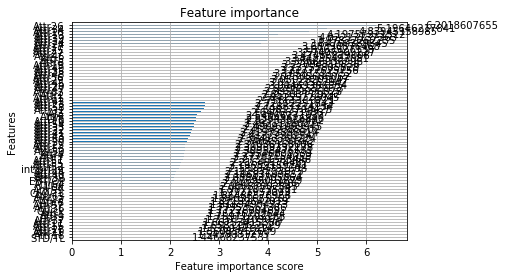

In [ ]:
xgb.plot_importance(clf.best_estimator_, importance_type = "gain", xlabel = "Feature importance score")

In [ ]:
y_train_prob = clf.predict_proba(x_train)


# Get the validation probabilities
y_val_prob = clf.predict_proba(x_val)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data.label, y_train_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

1.0

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(val_data.label, y_val_prob[:,1], pos_label = 1)
metrics.auc(fpr, tpr)

0.9178877807470363

In [ ]:
thresh = np.arange(0.01, 1, .01) # create array 0.01, 0.02, 0.03, ..., 0.99

# create empty lists for each metric
precision_values = []
recall_values = []
acc_values = []
f1_values = []

# Loop through each threshold value - .01, .02, .03, ..., .99
for val in thresh:
    
    # get 1 / 0 predictions based off probability threshold
    pred = [1 if prob >= val else 0 for prob in y_train_prob[:,1]]
    
    # calculate precision, recall, accuracy, and f1-score
    precision = metrics.precision_score(y_train, pred)
    recall = metrics.recall_score(y_train, pred)
    accuracy = metrics.accuracy_score(y_train, pred)
    f1_score = metrics.f1_score(y_train, pred)
    
    # add precision, recall, accuracy, and f1-score to their respective lists
    precision_values.append(precision)
    recall_values.append(recall)
    acc_values.append(accuracy)
    f1_values.append(f1_score)

# put precision, recall, and accuracy values into a data frame
result = pd.DataFrame()
result["threshold"] = thresh
result["precision"] = precision_values
result["recall"] = recall_values
result["accuracy"] = acc_values
result["f1_score"] = f1_values

result

,threshold,precision,recall,accuracy,f1_score
0,0.01000,0.13145,1.00000,0.87729,0.23235
1,0.02000,0.23508,1.00000,0.93957,0.38067
2,0.03000,0.36111,1.00000,0.96714,0.53061
3,0.04000,0.50781,1.00000,0.98200,0.67358
4,0.05000,0.63415,1.00000,0.98929,0.77612
5,0.06000,0.71429,1.00000,0.99257,0.83333
6,0.07000,0.80247,1.00000,0.99543,0.89041
7,0.08000,0.86093,1.00000,0.99700,0.92527
8,0.09000,0.89655,1.00000,0.99786,0.94545
9,0.10000,0.92199,1.00000,0.99843,0.95941


In [ ]:
result.iloc[result.f1_score.idxmax()]

threshold   0.25000
precision   1.00000
recall      1.00000
accuracy    1.00000
f1_score    1.00000
Name: 24, dtype: float64

In [ ]:
# get 1 / 0 predictions based off probability threshold
pred = [1 if prob >= 0.4 else 0 for prob in y_val_prob[:,1]]

# calculate precision, recall, accuracy, and f1-score
precision = metrics.precision_score(y_val, pred)
recall = metrics.recall_score(y_val, pred)
accuracy = metrics.accuracy_score(y_val, pred)
f1_score = metrics.f1_score(y_val, pred)

print("Validation precision: ", precision)
print("Validation recall: ", recall)
print("Validation accuracy: ", accuracy)
print("Validation F1-Score: ", f1_score)


('Validation precision: ', 0.8)
('Validation recall: ', 0.1095890410958904)
('Validation accuracy: ', 0.9776666666666667)
('Validation F1-Score: ', 0.19277108433734938)


### During several runs, we had cases where both the training and validation evaluation metrics returned perfect ones- this is impossible, given how the accuracy should drop off for the validation after a certain time. However, we can see that conducting this model has drastically improved the percision score for the validation set. Recall and F-1 Scores have also risen above their usual 0 values.

### Overall, our model requires far more tuning for it to be considered viable. We believe that one of the keys would be to analyze the the correlation matrix more intently, and eliminate variables are too closely correlated with each other. Furthermore, utilizing PCA might serve to, at the very least, determine the optimal ammount of variables needed to explain the variance in the data.  

# k values 2 to 20 for each model (find inertia & Silhouette scores)

In [ ]:
scaled_data=(initial_engin_set-initial_engin_set.min()) / (initial_engin_set.max() - initial_engin_set.min())
scaled_data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint
0,0.06423,0.98530,0.88366,0.00601,0.92315,0.17773,0.99560,0.03316,0.00850,0.01861,0.89329,0.83679,0.06366,0.99560,0.40984,0.18788,0.03436,0.91153,0.98682,0.00007,0.00003,0.90782,0.98682,0.75914,0.05453,0.22335,0.00130,0.03945,0.53539,0.00864,0.96943,0.00061,0.04319,0.07147,0.86795,0.00927,0.00001,0.00728,0.98016,0.06476,0.64621,0.78306,0.00119,0.00313,0.96893,0.04480,0.00042,0.91580,0.98529,0.03179,0.01115,0.00061,0.46708,0.03979,0.45245,0.98680,0.53125,0.00901,0.10252,0.00100,0.00333,0.00035,0.00900,0.00005,0.00000,0.38280,0.81406,0.12712,0.71902,0.33191,0.82879,0.31335,0.85995
1,0.06286,0.98559,0.89558,0.00491,0.92315,0.17773,0.99536,0.02147,0.02747,0.01824,0.88757,0.83394,0.06363,0.99536,0.40911,0.17821,0.02271,0.91130,0.98627,0.00055,0.00003,0.90356,0.98627,0.75960,0.05615,0.21208,0.00130,0.03950,0.49046,0.00838,0.96840,0.00034,0.04868,0.11469,0.86206,0.02996,0.00009,0.00680,0.97975,0.05978,0.64501,0.78284,0.00145,0.00300,0.96883,0.04215,0.00053,0.90918,0.98494,0.04687,0.03096,0.00034,0.46750,0.03985,0.45234,0.98333,0.53108,0.01113,0.10246,0.00013,0.00347,0.00029,0.01059,0.00026,0.00000,0.38420,0.81762,0.12882,0.72157,0.33160,0.82875,0.31310,0.86316
2,0.06404,0.98640,0.86817,0.00314,0.92314,0.17773,0.99557,0.01052,0.02436,0.01723,0.89671,0.83554,0.06365,0.99557,0.40993,0.18455,0.01179,0.91149,0.98657,0.00160,0.00002,0.91285,0.98657,0.75944,0.05334,0.21946,0.00130,0.03942,0.59619,0.00865,0.96883,0.00055,0.04387,0.07791,0.88081,0.02657,0.00001,0.00655,0.98112,0.05869,0.64589,0.78335,0.00154,0.00143,0.96884,0.03850,0.00086,0.91820,0.98557,0.02080,0.04084,0.00055,0.46665,0.03977,0.45214,0.98471,0.53127,0.01083,0.10294,0.00004,0.00726,0.00044,0.00714,0.00019,0.00000,0.38235,0.81348,0.12851,0.69945,0.33168,0.82877,0.31328,0.86301
3,0.06397,0.98625,0.87877,0.00395,0.92315,0.17776,0.99557,0.01038,0.01569,0.01713,0.89237,0.83561,0.06366,0.99557,0.41016,0.18220,0.01289,0.91149,0.98668,0.00143,0.00003,0.91066,0.98663,0.75886,0.05340,0.21643,0.00130,0.03944,0.61292,0.00984,0.96885,0.00119,0.04026,0.05578,0.87154,0.00757,0.00001,0.00669,0.98115,0.05884,0.64599,0.78365,0.00455,0.00994,0.96884,0.04125,0.00081,0.91814,0.98589,0.01894,0.02701,0.00119,0.46653,0.03976,0.45325,0.98463,0.53125,0.01029,0.10324,0.00005,0.00104,0.00105,0.00298,0.00005,0.00000,0.38236,0.81291,0.12944,0.71486,0.33182,0.82873,0.31339,0.86303
4,0.06605,0.98558,0.90851,0.00600,0.92315,0.17773,0.99601,0.02193,0.02674,0.01826,0.90373,0.83944,0.06369,0.99601,0.40974,0.21437,0.02317,0.91190,0.98720,0.00065,0.00003,0.91932,0.98708,0.76009,0.05324,0.24917,0.00131,0.03957,0.54622,0.00828,0.96947,0.00038,0.04740,0.10409,0.88336,0.02917,0.00004,0.00686,0.98121,0.06174,0.64580,0.78367,0.00140,0.00268,0.96886,0.04319,0.00059,0.92367,0.98595,0.05307,0.02822,0.00038,0.46776,0.03991,0.45326,0.98479,0.53150,0.01021,0.10247,0.00011,0.00388,0.00027,0.01131,0.00030,0.00000,0.38383,0.81980,0.12958,0.73510,0.33159,0.82876,0.31345,0.86320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.06390,0.98619,0.86804,0.00313,0.92314,0.17779,0.99555,0.01220,0.01436,0.01749,0.89186,0.83539,0.06364,0.99555,0.41039,0.18145,0.01350,0.91147,0.98655,0.00161,0.00003,0.90902,0.98655,0.75888,0.05432,0.21585,0.00130,0.03942,0.60171,0.00916,0.96870,0.00110,0.04050,0.05523,

In [ ]:
cluster_model = KMeans(n_clusters = 5, random_state = 0).fit(scaled_data)

In [ ]:
cluster_model.labels_

array([4, 0, 4, ..., 2, 4, 4], dtype=int32)

In [ ]:
data_with_cluster = initial_engin_set
data_with_cluster["kmeans_cluster"] = cluster_model.labels_
data_with_cluster.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint,kmeans_cluster
0,-0.03154,-0.09131,-0.04027,-0.01353,0.00741,-0.01605,-0.00026,0.64124,-0.74839,0.12679,-0.21442,-0.03658,-0.01093,-0.00027,-0.00530,-0.24280,0.57999,-0.00240,0.02926,-0.07034,-0.01644,-0.40317,0.03309,-0.00452,0.05022,-0.20667,-0.00999,-0.01937,-0.63111,-0.01555,0.06622,-0.01397,-0.36865,-0.14438,-0.43560,-0.97416,-0.03408,0.07976,-0.01617,0.18124,-0.00721,-0.01395,-0.01931,-0.00908,0.01723,0.14745,-0.04194,-0.14790,0.00486,-0.19233,-1.02709,-0.01332,-0.01636,-0.01811,-0.11058,0.01437,0.00546,-0.01414,-0.02092,0.06840,-0.21448,-0.01391,-0.17394,-0.04679,0,1.55947,-0.43530,-0.23384,0.08395,15.99532,11.24803,0.01239,-7.90898,4
1,-0.23173,-0.04945,0.30438,-0.08098,0.00751,-0.01605,-0.03496,0.07471,0.46981,0.07376,-0.83551,-0.29961,-0.01306,-0.03497,-0.11963,-0.60333,0.04067,-0.03657,-0.02591,-0.04795,-0.01696,-0.87342,-0.02219,0.04893,0.27410,-0.59146,-0.01093,-0.01583,-1.16855,-0.02221,-0.03149,-0.02316,0.02198,1.22897,-0.98626,0.18976,-0.02446,0.01107,-0.05264,-0.08808,-0.00788,-0.03964,-0.01644,-0.00966,0.00237,-0.01353,-0.03503,-0.78962,-0.02522,0.18678,-0.07906,-0.02253,-0.00301,-0.01446,-0.11492,0.00849,-0.00839,-0.00867,-0.02309,-0.03350,-0.20580,-0.01517,-0.07306,-0.02724,0,13.38507,0.74205,-0.03552,0.21183,-17.24992,1.59884,-0.03946,-0.04570,0
2,-0.05860,0.06506,-0.48840,-0.18949,0.00657,-0.01605,-0.00495,-0.45629,0.27035,-0.07129,0.15694,-0.15121,-0.01172,-0.00496,0.00948,-0.36716,-0.46482,-0.00702,0.00439,0.00176,-0.01750,0.15244,0.00817,0.03065,-0.11435,-0.33940,-0.00993,-0.02093,0.09621,-0.01523,0.00913,-0.01599,-0.32020,0.05997,0.76616,-0.00081,-0.03454,-0.02380,0.06847,-0.14756,-0.00740,0.02026,-0.01538,-0.01652,0.00391,-0.23474,-0.01295,0.08458,0.03026,-0.46863,0.39359,-0.01534,-0.03016,-0.01964,-0.12327,0.01082,0.00678,-0.00944,-0.00792,-0.04346,0.01974,-0.01174,-0.29162,-0.03358,0,-2.19160,-0.62832,-0.07086,-0.89701,-8.05104,6.04962,-0.00236,-0.41517,4
3,-0.06938,0.04464,-0.18168,-0.14003,0.00748,-0.01092,-0.00560,-0.46297,-0.28675,-0.08527,-0.31476,-0.14553,-0.01101,-0.00560,0.04591,-0.45450,-0.41369,-0.00765,0.01572,-0.00643,-0.01611,-0.08946,0.01459,-0.03816,-0.10595,-0.44299,-0.00992,-0.01957,0.29628,0.01467,0.01129,0.00659,-0.57718,-0.64308,-0.10031,-1.06979,-0.03447,-0.00411,0.07102,-0.13932,-0.00734,0.05576,0.01869,0.02076,0.00406,-0.06791,-0.01661,0.07952,0.05851,-0.51519,-0.26790,0.00728,-0.03393,-0.01998,-0.07708,0.01068,0.00538,-0.01084,0.00138,-0.04283,-0.35052,0.00297,-0.55469,-0.04682,0,-2.15996,-0.81631,0.03701,-0.12479,6.12404,-6.00118,0.02115,-0.36564,4
4,0.23642,-0.05191,0.67834,-0.01468,0.00788,-0.01605,0.05742,0.09718,0.42341,0.07688,0.91886,0.20869,-0.00891,0.05741,-0.02102,0.74419,0.06206,0.05440,0.06732,-0.04311,-0.01605,0.86683,0.05978,0.10772,-0.12763,0.67520,-0.00906,-0.01206,-0.50147,-0.02462,0.06962,-0.02194,-0.06916,0.89199,1.00464,0.14542,-0.03040,0.01969,0.07630,0.01786,-0.00744,0.05730,-0.01701,-0.01104,0.00655,0.04988,-0.03118,0.61541,0.06305,0.34287,-0.21025,-0.02131,0.00523,-0.01074,-0.07664,0.01097,0.02529,-0.01106,-0.02254,-0.03589,-0.18156,-0.01562,-0.02784,-0.02369,0,10.28991,1.46273,0.05379,0.88957,-17.86936,4.05018,0.03407,0.05255,4


In [ ]:
data_with_cluster.kmeans_cluster.value_counts()

4    4563
0    2534
2    2139
3     561
1     203
Name: kmeans_cluster, dtype: int64

In [ ]:
cluster_model.inertia_

161.6120278577146

In [ ]:
# use 2 to 21 so that 20 will be included
k_values = range(2, 21)

inertias = []
silhouettes = []

for k in k_values:
    
    cluster_model = KMeans(n_clusters = k, random_state = 0).fit(scaled_data)
    
    inertias.append(cluster_model.inertia_)
    silhouettes.append(metrics.silhouette_score(scaled_data, labels = cluster_model.labels_))

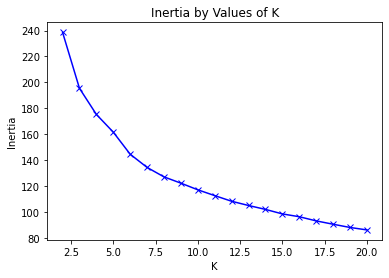

In [ ]:
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Inertia by Values of K')
plt.show()

In [ ]:
# running cluster with k = 3 because that's closest
# to the point on the graph shown with sharpness
cluster_model = KMeans(n_clusters = 3, random_state = 0).fit(scaled_data)

In [ ]:
data_with_cluster = initial_engin_set
data_with_cluster["kmeans_cluster"] = cluster_model.labels_
data_with_cluster.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint,kmeans_cluster
0,-0.03154,-0.09131,-0.04027,-0.01353,0.00741,-0.01605,-0.00026,0.64124,-0.74839,0.12679,-0.21442,-0.03658,-0.01093,-0.00027,-0.00530,-0.24280,0.57999,-0.00240,0.02926,-0.07034,-0.01644,-0.40317,0.03309,-0.00452,0.05022,-0.20667,-0.00999,-0.01937,-0.63111,-0.01555,0.06622,-0.01397,-0.36865,-0.14438,-0.43560,-0.97416,-0.03408,0.07976,-0.01617,0.18124,-0.00721,-0.01395,-0.01931,-0.00908,0.01723,0.14745,-0.04194,-0.14790,0.00486,-0.19233,-1.02709,-0.01332,-0.01636,-0.01811,-0.11058,0.01437,0.00546,-0.01414,-0.02092,0.06840,-0.21448,-0.01391,-0.17394,-0.04679,0,1.55947,-0.43530,-0.23384,0.08395,15.99532,11.24803,0.01239,-7.90898,0
1,-0.23173,-0.04945,0.30438,-0.08098,0.00751,-0.01605,-0.03496,0.07471,0.46981,0.07376,-0.83551,-0.29961,-0.01306,-0.03497,-0.11963,-0.60333,0.04067,-0.03657,-0.02591,-0.04795,-0.01696,-0.87342,-0.02219,0.04893,0.27410,-0.59146,-0.01093,-0.01583,-1.16855,-0.02221,-0.03149,-0.02316,0.02198,1.22897,-0.98626,0.18976,-0.02446,0.01107,-0.05264,-0.08808,-0.00788,-0.03964,-0.01644,-0.00966,0.00237,-0.01353,-0.03503,-0.78962,-0.02522,0.18678,-0.07906,-0.02253,-0.00301,-0.01446,-0.11492,0.00849,-0.00839,-0.00867,-0.02309,-0.03350,-0.20580,-0.01517,-0.07306,-0.02724,0,13.38507,0.74205,-0.03552,0.21183,-17.24992,1.59884,-0.03946,-0.04570,0
2,-0.05860,0.06506,-0.48840,-0.18949,0.00657,-0.01605,-0.00495,-0.45629,0.27035,-0.07129,0.15694,-0.15121,-0.01172,-0.00496,0.00948,-0.36716,-0.46482,-0.00702,0.00439,0.00176,-0.01750,0.15244,0.00817,0.03065,-0.11435,-0.33940,-0.00993,-0.02093,0.09621,-0.01523,0.00913,-0.01599,-0.32020,0.05997,0.76616,-0.00081,-0.03454,-0.02380,0.06847,-0.14756,-0.00740,0.02026,-0.01538,-0.01652,0.00391,-0.23474,-0.01295,0.08458,0.03026,-0.46863,0.39359,-0.01534,-0.03016,-0.01964,-0.12327,0.01082,0.00678,-0.00944,-0.00792,-0.04346,0.01974,-0.01174,-0.29162,-0.03358,0,-2.19160,-0.62832,-0.07086,-0.89701,-8.05104,6.04962,-0.00236,-0.41517,2
3,-0.06938,0.04464,-0.18168,-0.14003,0.00748,-0.01092,-0.00560,-0.46297,-0.28675,-0.08527,-0.31476,-0.14553,-0.01101,-0.00560,0.04591,-0.45450,-0.41369,-0.00765,0.01572,-0.00643,-0.01611,-0.08946,0.01459,-0.03816,-0.10595,-0.44299,-0.00992,-0.01957,0.29628,0.01467,0.01129,0.00659,-0.57718,-0.64308,-0.10031,-1.06979,-0.03447,-0.00411,0.07102,-0.13932,-0.00734,0.05576,0.01869,0.02076,0.00406,-0.06791,-0.01661,0.07952,0.05851,-0.51519,-0.26790,0.00728,-0.03393,-0.01998,-0.07708,0.01068,0.00538,-0.01084,0.00138,-0.04283,-0.35052,0.00297,-0.55469,-0.04682,0,-2.15996,-0.81631,0.03701,-0.12479,6.12404,-6.00118,0.02115,-0.36564,2
4,0.23642,-0.05191,0.67834,-0.01468,0.00788,-0.01605,0.05742,0.09718,0.42341,0.07688,0.91886,0.20869,-0.00891,0.05741,-0.02102,0.74419,0.06206,0.05440,0.06732,-0.04311,-0.01605,0.86683,0.05978,0.10772,-0.12763,0.67520,-0.00906,-0.01206,-0.50147,-0.02462,0.06962,-0.02194,-0.06916,0.89199,1.00464,0.14542,-0.03040,0.01969,0.07630,0.01786,-0.00744,0.05730,-0.01701,-0.01104,0.00655,0.04988,-0.03118,0.61541,0.06305,0.34287,-0.21025,-0.02131,0.00523,-0.01074,-0.07664,0.01097,0.02529,-0.01106,-0.02254,-0.03589,-0.18156,-0.01562,-0.02784,-0.02369,0,10.28991,1.46273,0.05379,0.88957,-17.86936,4.05018,0.03407,0.05255,0


### Silhouette Method

In [ ]:
{k : metric for k,metric in zip(k_values, silhouettes)}

{2: 0.8418646218930927,
 3: 0.27520928542214074,
 4: 0.2914380764138494,
 5: 0.23840455913811437,
 6: 0.2387901390441623,
 7: 0.2401163362965793,
 8: 0.2413683679316985,
 9: 0.19151872668791192,
 10: 0.18754670719668554,
 11: 0.18678661149486125,
 12: 0.18748449671611456,
 13: 0.18961221069001102,
 14: 0.17247224450460416,
 15: 0.17256945032342036,
 16: 0.17293986467966643,
 17: 0.17774951067188416,
 18: 0.18092870641266284,
 19: 0.1777677016087383,
 20: 0.18060141204823946}

# PCA

In [ ]:
train_scaled = initial_engin_set
train_scaled.iloc[:,:-1] = (train_scaled.iloc[:,:-1] - train_scaled.iloc[:,:-1].mean()) / train_scaled.iloc[:,:-1].std()

In [ ]:
train_scaled

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint,kmeans_cluster
0,-0.02829,-0.05972,-0.03616,-0.02041,0.00867,-0.01360,0.00474,0.59392,-0.64476,0.08479,-0.17381,-0.03098,-0.00846,0.00474,-0.00026,-0.24900,0.54022,0.00375,0.03004,-0.12763,-0.01915,-0.32179,0.03289,0.00641,0.03208,-0.21496,-0.01125,-0.02505,-0.62787,-0.02202,0.06545,-0.01683,-0.33151,-0.14223,-0.37054,-0.90216,-0.03068,0.05122,-0.01695,0.25829,0.01891,-0.00824,-0.06981,0.01443,0.01656,0.16244,-0.04440,-0.12005,0.00536,-0.19509,-0.97520,-0.01463,-0.02561,-0.02315,-0.12429,0.26272,0.00035,-0.16814,-0.03911,0.05098,-0.19537,-0.02543,-0.17458,-0.04598,-0.14394,0.03297,-0.12589,-0.27286,0.01210,0.01259,0.00766,-0.04285,-0.28559,0
1,-0.17164,-0.03002,0.30323,-0.09469,0.00875,-0.01360,-0.01982,0.06168,0.39537,0.04711,-0.68221,-0.30187,-0.01186,-0.01983,-0.09364,-0.61192,0.03035,-0.02070,-0.01983,-0.08226,-0.01953,-0.70143,-0.01710,0.05489,0.19664,-0.60573,-0.01195,-0.01955,-1.16220,-0.04047,-0.02657,-0.03864,-0.00064,1.10730,-0.84340,0.16551,-0.02321,0.00255,-0.05735,-0.12136,-0.11543,-0.03205,-0.04689,0.00534,0.00604,-0.01873,-0.03616,-0.66449,-0.02399,0.18751,-0.07344,-0.03698,0.01505,-0.01752,-0.12960,-0.07552,-0.01891,0.04152,-0.04375,-0.03038,-0.18796,-0.02997,-0.08412,-0.02498,-0.14394,0.17797,0.22509,-0.11076,0.09059,-0.02353,0.00335,-0.06023,0.01101,0
2,-0.04766,0.05123,-0.47746,-0.21420,0.00807,-0.01360,0.00142,-0.43717,0.22506,-0.05595,0.13018,-0.14904,-0.00972,0.00142,0.01182,-0.37419,-0.44753,0.00045,0.00756,0.01842,-0.01991,0.12676,0.01036,0.03831,-0.08889,-0.34975,-0.01121,-0.02747,0.09525,-0.02114,0.01168,-0.02162,-0.29048,0.04370,0.66144,-0.00931,-0.03104,-0.02216,0.07683,-0.20522,-0.01753,0.02348,-0.03837,-0.10302,0.00712,-0.26767,-0.00986,0.07720,0.03015,-0.47392,0.37614,-0.01954,-0.06763,-0.02551,-0.13979,0.05845,0.00219,0.01201,-0.01127,-0.03832,0.00462,-0.01757,-0.28011,-0.03179,-0.14394,-0.01303,-0.18344,-0.13964,-0.58997,-0.01353,0.00534,-0.04780,-0.00293,2
3,-0.05538,0.03674,-0.17542,-0.15973,0.00872,-0.00961,0.00097,-0.44345,-0.25061,-0.06588,-0.25594,-0.14319,-0.00859,0.00096,0.04158,-0.46210,-0.39918,-0.00000,0.01780,0.00183,-0.01892,-0.06853,0.01616,-0.02410,-0.08272,-0.45496,-0.01120,-0.02536,0.29415,0.06161,0.01372,0.03195,-0.50815,-0.59596,-0.08262,-0.98988,-0.03098,-0.00820,0.07966,-0.19360,-0.00542,0.05639,0.23433,0.48595,0.00723,-0.07992,-0.01422,0.07290,0.05771,-0.52091,-0.25306,0.03534,-0.07909,-0.02603,-0.08338,0.05063,0.00024,-0.04172,0.00864,-0.03782,-0.31153,0.03546,-0.51600,-0.04602,-0.14394,-0.01264,-0.23948,-0.05147,-0.11602,0.00187,-0.00004,-0.03991,-0.00106,2
4,0.16361,-0.03177,0.67148,-0.02168,0.00901,-0.01360,0.04558,0.08280,0.35574,0.04933,0.75387,0.22161,-0.00523,0.04558,-0.01309,0.74451,0.05058,0.04440,0.06443,-0.07246,-0.01887,0.70351,0.05702,0.10820,-0.09866,0.68065,-0.01055,-0.01369,-0.49898,-0.04714,0.06865,-0.03574,-0.07784,0.80070,0.86623,0.12483,-0.02782,0.00866,0.08550,0.02798,-0.02746,0.05782,-0.05145,-0.01643,0.00899,0.05263,-0.03158,0.52756,0.06214,0.34504,-0.19823,-0.03401,0.04014,-0.01177,-0.08285,0.06711,0.02795,-0.04996,-0.04256,-0.03229,-0.16726,-0.03159,-0.04357,-0.02117,-0.14394,0.14002,0.43994,-0.03775,0.50654,-0.02420,0.00444,-0.03559,0.01471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.06265,0.02977,

In [ ]:
pca_model = PCA(n_components = 16, random_state = 0)

x_train_pca = pca_model.fit_transform(train_scaled)
x_train_pca = pd.DataFrame(data = x_train_pca, index = train_scaled.index)

x_train_pca_inverse = pca_model.inverse_transform(x_train_pca)
x_train_pca_inverse = pd.DataFrame(data=x_train_pca_inverse, \
                                   index=train_scaled.index)

In [ ]:
from tqdm import tqdm

In [ ]:
scores = {}
for n in tqdm(range(2, 10)):
    pca_model = PCA(n_components = n, random_state = 0)
    
    x_train_pca = pca_model.fit_transform(train_scaled)
    x_train_pca = pd.DataFrame(data = x_train_pca, index = train_scaled.index)
    
    x_train_pca_inverse = pca_model.inverse_transform(x_train_pca)
    x_train_pca_inverse = pd.DataFrame(data=x_train_pca_inverse, \
                                       index=train_scaled.index)
    
    anomalyScoresPCA = anomalyScores(train_scaled, x_train_pca_inverse)

100%|██████████| 8/8 [00:00<00:00,  8.19it/s]


In [ ]:
pca_model = PCA(random_state = 0).fit(train_scaled)

In [ ]:
pca_model.explained_variance_ratio_

array([1.88998196e-01, 1.32829685e-01, 8.74777449e-02, 4.04459057e-02,
       3.85060725e-02, 3.67233137e-02, 3.33266215e-02, 3.13105507e-02,
       2.96636870e-02, 2.21100592e-02, 2.06955258e-02, 1.98846974e-02,
       1.65883335e-02, 1.58338851e-02, 1.49978002e-02, 1.41684535e-02,
       1.38985645e-02, 1.36678114e-02, 1.35917734e-02, 1.35556919e-02,
       1.35386835e-02, 1.35263063e-02, 1.35017525e-02, 1.34710231e-02,
       1.34039397e-02, 1.32978987e-02, 1.28777537e-02, 1.27471950e-02,
       1.08844899e-02, 1.05737890e-02, 9.98154906e-03, 8.18548407e-03,
       7.70846551e-03, 6.90286615e-03, 6.76056507e-03, 5.71985886e-03,
       3.76882096e-03, 3.45193130e-03, 3.07249554e-03, 2.91933656e-03,
       2.82228875e-03, 2.23501213e-03, 1.90087398e-03, 1.41988678e-03,
       1.21784292e-03, 1.07684056e-03, 9.66172651e-04, 7.11317506e-04,
       5.66263453e-04, 5.05156211e-04, 4.79143346e-04, 4.03069131e-04,
       2.84284127e-04, 1.95808889e-04, 1.65257977e-04, 1.18896221e-04,
      

In [ ]:
var_explained = np.cumsum(pca_model.explained_variance_ratio_)
var_explained

array([0.1889982 , 0.32182788, 0.40930563, 0.44975153, 0.4882576 ,
       0.52498092, 0.55830754, 0.58961809, 0.61928178, 0.64139184,
       0.66208736, 0.68197206, 0.69856039, 0.71439428, 0.72939208,
       0.74356053, 0.7574591 , 0.77112691, 0.78471868, 0.79827437,
       0.81181306, 0.82533936, 0.83884112, 0.85231214, 0.86571608,
       0.87901398, 0.89189173, 0.90463893, 0.91552342, 0.9260972 ,
       0.93607875, 0.94426424, 0.9519727 , 0.95887557, 0.96563613,
       0.97135599, 0.97512481, 0.97857675, 0.98164924, 0.98456858,
       0.98739087, 0.98962588, 0.99152675, 0.99294664, 0.99416448,
       0.99524132, 0.9962075 , 0.99691881, 0.99748508, 0.99799023,
       0.99846938, 0.99887244, 0.99915673, 0.99935254, 0.9995178 ,
       0.99963669, 0.99973331, 0.99980243, 0.99986714, 0.99990426,
       0.99992993, 0.99995518, 0.99997482, 0.99998659, 0.99999523,
       0.99999821, 0.99999901, 0.99999955, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

# PCA with 90% variance

In [ ]:
np.where(var_explained >= .90)

(array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]),)

In [ ]:
np.where(var_explained >= .90)[0].min()

27

In [ ]:
pca_data = pd.DataFrame(pca_model.fit_transform(train_scaled))
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,-0.13502,-0.16666,0.03613,0.12310,-0.44189,0.36097,-0.29920,-0.03321,-0.01863,0.80765,-0.86289,0.81090,-0.15815,0.40385,0.44969,0.19484,0.02449,0.24183,0.07386,-0.03658,0.07905,-0.03638,0.01942,0.05214,0.12636,0.15966,-0.30681,0.47274,0.12265,-0.39033,-0.48840,-0.00480,0.88300,0.49091,-0.33174,0.04605,-0.20683,-0.04239,-0.11602,-0.07754,0.19649,0.12961,-0.11075,0.00643,0.04814,0.08541,-0.07686,0.06432,-0.08538,-0.04942,-0.04828,0.02498,-0.07956,0.01828,-0.19583,-0.04161,-0.12312,0.04137,-0.07094,0.06515,0.08457,-0.05670,0.05668,-0.01408,0.01629,0.00468,-0.00284,0.00208,-0.00249,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.70899,0.00116,0.00343,-0.58154,0.84923,0.16657,0.14794,-0.08461,-0.04161,1.08962,-1.47944,0.69339,0.13383,-0.62492,0.11751,-0.12313,-0.06183,0.12157,0.02933,-0.16560,0.10702,0.01790,-0.01828,0.18336,0.08007,0.01964,-0.49774,-0.01664,0.26042,-0.18632,-0.15518,-0.29323,-0.36536,0.32405,-0.06300,-0.06585,0.12190,-0.37763,-0.26993,0.00241,0.02327,0.02210,-0.02604,-0.04507,0.01487,-0.05213,-0.02312,0.03407,-0.03096,-0.00492,-0.09775,-0.29522,-0.00249,-0.00667,0.01825,0.01497,0.03062,0.01243,-0.00121,-0.00900,-0.00259,0.02156,-0.00285,0.00786,0.00303,-0.00076,-0.00222,0.00128,-0.00126,0.00000,-0.00000,0.00000,-0.00000,0.00000
2,0.04647,0.07413,-1.26549,-0.08687,0.10131,-0.08042,0.01117,-0.04494,-0.04053,-0.57012,0.66881,-0.26007,0.04034,-0.13826,-0.27689,0.04435,-0.02221,-0.02427,-0.05762,0.00536,-0.06974,0.00406,0.01614,-0.01258,0.09812,-0.02436,-0.07527,-0.31661,-0.26794,0.32224,0.24339,-0.26693,0.12671,0.09111,-0.10006,-0.02142,0.19441,0.03977,-0.31516,0.06019,-0.54469,-0.10517,0.02371,-0.49740,0.01713,-0.04602,0.01683,-0.03705,0.01341,-0.02538,0.04651,0.03863,-0.07521,-0.00128,0.03004,-0.00072,-0.00250,0.01423,0.00997,-0.03222,-0.04777,-0.00526,0.03245,0.00442,0.02194,-0.00204,0.00118,-0.00175,-0.00270,0.00000,0.00000,-0.00000,0.00000,0.00000
3,0.04491,0.27550,-1.39530,0.52178,-0.96346,0.52086,-0.10569,-0.21277,-0.06555,-0.18275,0.25935,-0.33607,0.03086,-0.03899,0.34925,-0.10013,-0.10906,0.05517,-0.10747,0.03696,-0.00027,0.01820,-0.00260,-0.07521,0.06125,-0.03684,-0.29521,0.05324,-0.13451,0.10118,0.04064,-0.27467,0.16472,0.45101,-0.21769,0.02297,0.24590,0.42089,-0.30508,0.37611,-0.21863,0.09083,-0.10402,-0.10625,0.00592,-0.00822,-0.01661,0.02907,-0.01259,0.09790,-0.13336,0.03247,0.02604,-0.02316,0.04832,-0.00974,-0.00060,-0.00517,-0.01278,-0.00170,-0.00906,-0.01428,-0.02083,0.02026,-0.01815,0.01480,-0.00090,0.00313,-0.00162,0.00000,0.00001,0.00000,-0.00000,-0.00000
4,-0.99409,-0.33977,1.17924,-0.21658,0.55451,-1.06910,0.66671,0.20406,0.04156,0.45351,-0.39417,-0.53268,-0.26438,0.68903,-0.14845,-0.02565,-0.14900,-0.16169,-0.05835,-0.06648,-0.00831,0.04754,-0.08580,0.18261,-0.03707,-0.02376,0.03004,-0.17767,-0.08120,0.11911,0.20473,-0.09159,0.37942,0.13731,-0.07672,-0.04726,0.30138,-0.22087,0.04968,-0.08048,0.16743,-0.19253,0.13556,-0.07922,-0.01327,0.00780,-0.05168,-0.00059,-0.02739,0.06360,0.01829,0.13778,0.03455,-0.00363,0.00727,0.00277,0.02772,-0.00944,0.05048,0.01765,0.04410,0.02589,0.01056,-0.01696,-0.00631,-0.00109,-0.00272,0.00230,-0.00173,0.00000,-0.00000,0.00000,0.00000,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.40086,0.30819,-1.57716,0.37697,-0.73360,0.48563,-0.24239,-0.14292,-0.09024,-0.29574,0.38463,0.05965,0.00005,0.06214,0.27424,-0.11408,-0.13260,0.00579,-0.07724,0.07298,-0.03227,0.02520,-0.01596,-0.05367,0.08632,-0.05917,-0.30816,-0.05290,-0.02641,-0.00631,0.08667,-0.23588,-0.02724,0.07454,-0.08795,0.01839,0.26369,0.3170

In [ ]:
pca_need = pca_data.iloc[:,:24]
pca_need

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.13502,-0.16666,0.03613,0.12310,-0.44189,0.36097,-0.29920,-0.03321,-0.01863,0.80765,-0.86289,0.81090,-0.15815,0.40385,0.44969,0.19484,0.02449,0.24183,0.07386,-0.03658,0.07905,-0.03638,0.01942,0.05214
1,0.70899,0.00116,0.00343,-0.58154,0.84923,0.16657,0.14794,-0.08461,-0.04161,1.08962,-1.47944,0.69339,0.13383,-0.62492,0.11751,-0.12313,-0.06183,0.12157,0.02933,-0.16560,0.10702,0.01790,-0.01828,0.18336
2,0.04647,0.07413,-1.26549,-0.08687,0.10131,-0.08042,0.01117,-0.04494,-0.04053,-0.57012,0.66881,-0.26007,0.04034,-0.13826,-0.27689,0.04435,-0.02221,-0.02427,-0.05762,0.00536,-0.06974,0.00406,0.01614,-0.01258
3,0.04491,0.27550,-1.39530,0.52178,-0.96346,0.52086,-0.10569,-0.21277,-0.06555,-0.18275,0.25935,-0.33607,0.03086,-0.03899,0.34925,-0.10013,-0.10906,0.05517,-0.10747,0.03696,-0.00027,0.01820,-0.00260,-0.07521
4,-0.99409,-0.33977,1.17924,-0.21658,0.55451,-1.06910,0.66671,0.20406,0.04156,0.45351,-0.39417,-0.53268,-0.26438,0.68903,-0.14845,-0.02565,-0.14900,-0.16169,-0.05835,-0.06648,-0.00831,0.04754,-0.08580,0.18261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.40086,0.30819,-1.57716,0.37697,-0.73360,0.48563,-0.24239,-0.14292,-0.09024,-0.29574,0.38463,0.05965,0.00005,0.06214,0.27424,-0.11408,-0.13260,0.00579,-0.07724,0.07298,-0.03227,0.02520,-0.01596,-0.05367
9996,0.04461,-0.13439,0.55036,0.59475,-1.30814,0.15764,-0.71854,0.16440,-0.05984,-0.25575,0.20815,0.34011,0.18288,-0.55259,0.09795,0.13712,0.31212,0.25271,-0.01223,0.00416,-0.01736,-0.00007,0.04310,-0.09294
9997,0.62202,0.30122,-2.02098,0.26826,-0.74437,0.65272,-0.56209,-0.12278,-0.09312,-0.77736,0.85652,0.13438,0.14298,-0.26013,0.08909,-0.11084,-0.09359,0.06828,-0.04976,-0.02664,-0.03728,-0.00158,-0.00009,-0.04678
9998,-0.01013,0.13372,-0.68255,-0.16674,0.09165,0.43047,0.01971,-0.13892,-0.03795,0.74430,-0.87440,-0.19675,-0.07999,0.27498,0.69033,-0.05622,0.00279,0.16870,-0.00582,-0.00712,0.03671,-0.02930,0.06225,0.01974


In [ ]:
cluster_model = KMeans(n_clusters = 5, random_state = 0).fit(pca_need)

In [ ]:
frame = pd.DataFrame()
frame["cluster_label"] = cluster_model.labels_
frame

,cluster_label
0,3
1,3
2,3
3,3
4,3
...,...
9995,3
9996,3
9997,3
9998,3


In [ ]:
frame["count_sum"] = 1

In [ ]:
temp = frame.pivot_table(values='count_sum', index='cluster_label', aggfunc='count').fillna(0)
temp

,count_sum
cluster_label,
0,1058
1,1
2,1
3,8939
4,1


In [ ]:
k_values = range(2, 21)
inertias = []
silhouettes = []
for k in tqdm(k_values):
    
    cluster_model = KMeans(n_clusters = k, random_state = 0).fit(pca_need)
    
    inertias.append(cluster_model.inertia_)
    silhouettes.append(metrics.silhouette_score(pca_need, labels = cluster_model.labels_))

100%|██████████| 19/19 [00:51<00:00,  2.69s/it]


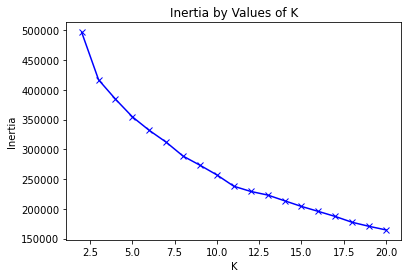

In [ ]:
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Inertia by Values of K')
plt.show()

In [ ]:
{k : metric for k,metric in zip(k_values, silhouettes)}

{2: 0.9858238036376843,
 3: 0.9817611202222899,
 4: 0.4807398282711396,
 5: 0.4824880468428233,
 6: 0.44525142528329087,
 7: 0.4467310890924979,
 8: 0.4461233124786092,
 9: 0.2016308848888993,
 10: 0.20857397315909385,
 11: 0.21255038720052857,
 12: 0.19192592006768364,
 13: 0.2088789236633269,
 14: 0.210432189321246,
 15: 0.21118169582958535,
 16: 0.20803200748534342,
 17: 0.1859298356091292,
 18: 0.1968505697853272,
 19: 0.19734148948143493,
 20: 0.20807628811174933}

In [ ]:
cluster_model = KMeans(n_clusters = 4, random_state = 0).fit(pca_need)

In [ ]:
frame = pd.DataFrame()
frame["cluster_label"] = cluster_model.labels_
frame["count_sum"] = 1

temp = frame.pivot_table(values='count_sum', index='cluster_label', aggfunc='count').fillna(0)
temp

,count_sum
cluster_label,
0,8940
1,1
2,1
3,1058


In [ ]:
mapping = {field : val for field, val in zip(train_scaled.columns, pca_model.components_[0])}
sorted(mapping.items(), key = lambda val: val[1])[::-1]

[('Attr38', 0.2546412966464052),
 ('Attr10', 0.25247438152781365),
 ('Attr1', 0.2452471544435982),
 ('Attr6', 0.2416555010129251),
 ('Attr25', 0.23766343821348979),
 ('CFO/TL', 0.21413663251489493),
 ('Attr51', 0.1534395669449206),
 ('Attr36', 0.1315322265633202),
 ('Attr9', 0.1284600971776523),
 ('Attr58', 0.04185676069533464),
 ('Attr62', 0.030105224290662837),
 ('Attr61', 0.026271102775332667),
 ('Attr30', 0.025566611048412846),
 ('Attr44', 0.018806266641926472),
 ('Attr43', 0.01723795611107837),
 ('Attr20', 0.013659736177335114),
 ('label', 0.006577360650764201),
 ('Attr32', 0.003312511144019191),
 ('Attr52', 0.0031698095640340213),
 ('Attr47', 0.002606715372290486),
 ('Attr59', 0.0012948846196166985),
 ('Attr21', 0.0006737854424527171),
 ('int/prfint', 0.0002508358496921972),
 ('Attr15', 2.3553960091127622e-05),
 ('Attr41', -1.051472835291167e-05),
 ('Attr60', -6.45387975079075e-05),
 ('kmeans_cluster', -9.929119064146237e-05),
 ('Attr5', -0.00011802849630208889),
 ('D/E', -0.0004

In [ ]:
train_scaled.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,label,D/E,AlZ,CFO/TL,J-UK,STD/TL,Quick,EBT/OP,int/prfint,kmeans_cluster
0,-0.02829,-0.05972,-0.03616,-0.02041,0.00867,-0.01360,0.00474,0.59392,-0.64476,0.08479,-0.17381,-0.03098,-0.00846,0.00474,-0.00026,-0.24900,0.54022,0.00375,0.03004,-0.12763,-0.01915,-0.32179,0.03289,0.00641,0.03208,-0.21496,-0.01125,-0.02505,-0.62787,-0.02202,0.06545,-0.01683,-0.33151,-0.14223,-0.37054,-0.90216,-0.03068,0.05122,-0.01695,0.25829,0.01891,-0.00824,-0.06981,0.01443,0.01656,0.16244,-0.04440,-0.12005,0.00536,-0.19509,-0.97520,-0.01463,-0.02561,-0.02315,-0.12429,0.26272,0.00035,-0.16814,-0.03911,0.05098,-0.19537,-0.02543,-0.17458,-0.04598,-0.14394,0.03297,-0.12589,-0.27286,0.01210,0.01259,0.00766,-0.04285,-0.28559,0
1,-0.17164,-0.03002,0.30323,-0.09469,0.00875,-0.01360,-0.01982,0.06168,0.39537,0.04711,-0.68221,-0.30187,-0.01186,-0.01983,-0.09364,-0.61192,0.03035,-0.02070,-0.01983,-0.08226,-0.01953,-0.70143,-0.01710,0.05489,0.19664,-0.60573,-0.01195,-0.01955,-1.16220,-0.04047,-0.02657,-0.03864,-0.00064,1.10730,-0.84340,0.16551,-0.02321,0.00255,-0.05735,-0.12136,-0.11543,-0.03205,-0.04689,0.00534,0.00604,-0.01873,-0.03616,-0.66449,-0.02399,0.18751,-0.07344,-0.03698,0.01505,-0.01752,-0.12960,-0.07552,-0.01891,0.04152,-0.04375,-0.03038,-0.18796,-0.02997,-0.08412,-0.02498,-0.14394,0.17797,0.22509,-0.11076,0.09059,-0.02353,0.00335,-0.06023,0.01101,0
2,-0.04766,0.05123,-0.47746,-0.21420,0.00807,-0.01360,0.00142,-0.43717,0.22506,-0.05595,0.13018,-0.14904,-0.00972,0.00142,0.01182,-0.37419,-0.44753,0.00045,0.00756,0.01842,-0.01991,0.12676,0.01036,0.03831,-0.08889,-0.34975,-0.01121,-0.02747,0.09525,-0.02114,0.01168,-0.02162,-0.29048,0.04370,0.66144,-0.00931,-0.03104,-0.02216,0.07683,-0.20522,-0.01753,0.02348,-0.03837,-0.10302,0.00712,-0.26767,-0.00986,0.07720,0.03015,-0.47392,0.37614,-0.01954,-0.06763,-0.02551,-0.13979,0.05845,0.00219,0.01201,-0.01127,-0.03832,0.00462,-0.01757,-0.28011,-0.03179,-0.14394,-0.01303,-0.18344,-0.13964,-0.58997,-0.01353,0.00534,-0.04780,-0.00293,2
3,-0.05538,0.03674,-0.17542,-0.15973,0.00872,-0.00961,0.00097,-0.44345,-0.25061,-0.06588,-0.25594,-0.14319,-0.00859,0.00096,0.04158,-0.46210,-0.39918,-0.00000,0.01780,0.00183,-0.01892,-0.06853,0.01616,-0.02410,-0.08272,-0.45496,-0.01120,-0.02536,0.29415,0.06161,0.01372,0.03195,-0.50815,-0.59596,-0.08262,-0.98988,-0.03098,-0.00820,0.07966,-0.19360,-0.00542,0.05639,0.23433,0.48595,0.00723,-0.07992,-0.01422,0.07290,0.05771,-0.52091,-0.25306,0.03534,-0.07909,-0.02603,-0.08338,0.05063,0.00024,-0.04172,0.00864,-0.03782,-0.31153,0.03546,-0.51600,-0.04602,-0.14394,-0.01264,-0.23948,-0.05147,-0.11602,0.00187,-0.00004,-0.03991,-0.00106,2
4,0.16361,-0.03177,0.67148,-0.02168,0.00901,-0.01360,0.04558,0.08280,0.35574,0.04933,0.75387,0.22161,-0.00523,0.04558,-0.01309,0.74451,0.05058,0.04440,0.06443,-0.07246,-0.01887,0.70351,0.05702,0.10820,-0.09866,0.68065,-0.01055,-0.01369,-0.49898,-0.04714,0.06865,-0.03574,-0.07784,0.80070,0.86623,0.12483,-0.02782,0.00866,0.08550,0.02798,-0.02746,0.05782,-0.05145,-0.01643,0.00899,0.05263,-0.03158,0.52756,0.06214,0.34504,-0.19823,-0.03401,0.04014,-0.01177,-0.08285,0.06711,0.02795,-0.04996,-0.04256,-0.03229,-0.16726,-0.03159,-0.04357,-0.02117,-0.14394,0.14002,0.43994,-0.03775,0.50654,-0.02420,0.00444,-0.03559,0.01471,0


In [ ]:
pca_need.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.13502,-0.16666,0.03613,0.12310,-0.44189,0.36097,-0.29920,-0.03321,-0.01863,0.80765,-0.86289,0.81090,-0.15815,0.40385,0.44969,0.19484,0.02449,0.24183,0.07386,-0.03658,0.07905,-0.03638,0.01942,0.05214
1,0.70899,0.00116,0.00343,-0.58154,0.84923,0.16657,0.14794,-0.08461,-0.04161,1.08962,-1.47944,0.69339,0.13383,-0.62492,0.11751,-0.12313,-0.06183,0.12157,0.02933,-0.16560,0.10702,0.01790,-0.01828,0.18336
2,0.04647,0.07413,-1.26549,-0.08687,0.10131,-0.08042,0.01117,-0.04494,-0.04053,-0.57012,0.66881,-0.26007,0.04034,-0.13826,-0.27689,0.04435,-0.02221,-0.02427,-0.05762,0.00536,-0.06974,0.00406,0.01614,-0.01258
3,0.04491,0.27550,-1.39530,0.52178,-0.96346,0.52086,-0.10569,-0.21277,-0.06555,-0.18275,0.25935,-0.33607,0.03086,-0.03899,0.34925,-0.10013,-0.10906,0.05517,-0.10747,0.03696,-0.00027,0.01820,-0.00260,-0.07521
4,-0.99409,-0.33977,1.17924,-0.21658,0.55451,-1.06910,0.66671,0.20406,0.04156,0.45351,-0.39417,-0.53268,-0.26438,0.68903,-0.14845,-0.02565,-0.14900,-0.16169,-0.05835,-0.06648,-0.00831,0.04754,-0.08580,0.18261
